# Reading the daily mean data and make horizontal plots
# Anylysis the two experiments with and without dust 
    ## by Xiaohui Liu 
    ## @@ 12.29.2023
    
    ## get results of sensitivity tests with AOT calculated SWR (v9)
    ## @@ 02,29,2024
    
    ## get single idealized dust case v8s1_newbnd and v8s4_newbnd
    ## the boundary are also revised 
    ## @@ 03.31.2024

In [2]:
import matplotlib.pyplot as plt
import cmocean.plots as cmp
import cmocean.cm as cmo
import xarray as xr
import pandas as pd
import numpy as np
%matplotlib inline
import h5py
from scipy.io import loadmat
from scipy.interpolate import griddata

import cross_spectral

# 1. Reading data

In [3]:
ds_topo = xr.open_dataset('era5frc_coldstart_01012017_era5v6/topo.nc',mode='r')
ds_topo

<xarray.Dataset>
Dimensions:     (lat: 481, lon: 661, var: 1)
Coordinates:
  * lat         (lat) float32 23.0 23.02 23.03 23.05 ... 30.95 30.97 30.98 31.0
  * lon         (lon) float32 47.0 47.02 47.03 47.05 ... 57.95 57.97 57.98 58.0
Dimensions without coordinates: var
Data variables:
    bathymetry  (lat, lon) float32 ...
    botchange   (lat, lon) float32 ...
    z0          (lat, lon) float32 ...
    grid_type   (var) float32 ...

In [57]:
## 1.0 make idealized curve with ln function

t0_up = np.arange(10)
t0_down = np.arange(100)

t_up = 5
t_down = 20

T0_up = 2
T0_down = 5

tau_up = -20
tau_down = 40


T_up = T0_up*np.exp(-t0_up/tau_up)
T_down = T0_down*np.exp(-t0_down/tau_down)

T_total = np.concatenate((T_up,T_down))

lnT_up = np.log(T_up)
lnT_down = np.log(T_down)

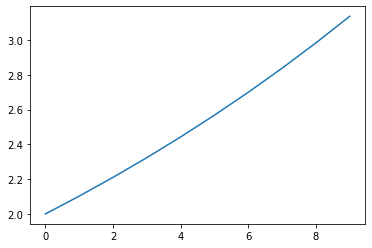

In [47]:
plt.plot(T_up)

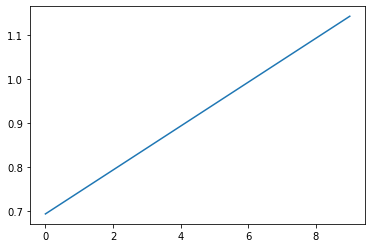

In [58]:
plt.plot(lnT_up)

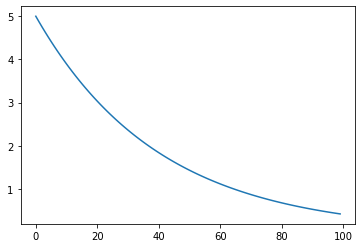

In [53]:
plt.plot(T_down)


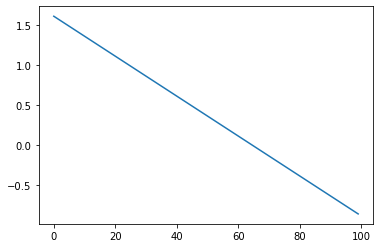

In [59]:
plt.plot(lnT_down)

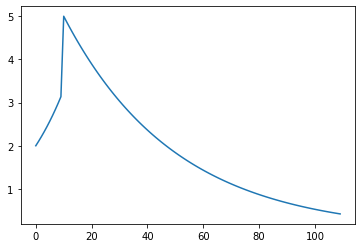

In [56]:
plt.plot(T_total)

In [ ]:
#0. prepare information of data directories etc. 

# datasets_era = []
# datasets_era_hot = []

# for im in range(1,13):      
# # 1.3 load ERA5 case 
# #     casename = 'PersianGulf_month'+str(im);
#     datatype = 'data/regions/mean_mon'+str(im)
#     runname = '~/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v3/data_results_2021/';

#     data_name = runname+datatype
#     file_3d = data_name+'.nc'
   
#     print("  Opening %s  file "%file_3d)
#     ds = xr.open_dataset(file_3d,mode='r')
#     datasets_era.append(ds)

datasets_era_v5 = []
for im in range(1,13):   
# load ERA5_v5 case         
    datatype = 'data/regions/mean_mon'+str(im)
    runname = '~/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v5/data_results_2021/';

    data_name = runname+datatype
    file_3d = data_name+'.nc'
    
    print("  Opening %s  file "%file_3d)
    ds = xr.open_dataset(file_3d,mode='r')
    datasets_era_v5.append(ds)

datasets_era_v6 = []    
for im in range(1,13):      
# 1.3 load ERA5 case (hotstart-v3)
#     casename = 'PersianGulf_month'+str(im);
    datatype = 'data/regions/mean_mon'+str(im)
    runname = '~/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v6/data_results_2021/';

    data_name = runname+datatype
    file_3d = data_name+'.nc'
    
    print("  Opening %s  file "%file_3d)
    ds = xr.open_dataset(file_3d,mode='r')
    datasets_era_v6.append(ds)

datasets_era_v6c = []    
for im in range(1,13):      
# 1.3 load ERA5 case (hotstart-v3)
#     casename = 'PersianGulf_month'+str(im);
    datatype = 'data/regions/mean_mon'+str(im)
    runname = '~/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v6c/data_results_2021/';

    data_name = runname+datatype
    file_3d = data_name+'.nc'
    
    print("  Opening %s  file "%file_3d)
    ds = xr.open_dataset(file_3d,mode='r')
    datasets_era_v6c.append(ds)

  Opening ~/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v5/data_results_2021/data/regions/mean_mon1.nc  file 
  Opening ~/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v5/data_results_2021/data/regions/mean_mon2.nc  file 
  Opening ~/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v5/data_results_2021/data/regions/mean_mon3.nc  file 
  Opening ~/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v5/data_results_2021/data/regions/mean_mon4.nc  file 
  Opening ~/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v5/data_results_2021/data/regions/mean_mon5.nc  file 
  Opening ~/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v5/data_results_2021/data/regions/mean_mon6.nc  file 
  Opening ~/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v5/data_results_2021/data/regions/mean_mon7.nc  file 
  Opening ~/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v5/data_results_2021/data/regions/mean_mon8.nc  file 
  Opening ~/GETM_shrad/getm/setups/era5f

## 1.2 reading daily surface temp/salt/velo data

In [4]:
# v8 s1 sensitivity (bnd revised)
datatype = 'data/regions/surface'
runname = '/home/ceoas/liux8/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v8s1_newbnd/data_results_2021/';

data_name = runname+datatype
file_3d = data_name+'.nc'

print("  Opening %s  file "%file_3d)
ds_sur_era_v8s1 = xr.open_dataset(file_3d,mode='r')

# v8 s4 sensitivity (bnd revised)
datatype = 'data/regions/surface'
runname = '/home/ceoas/liux8/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v8s4_newbnd/data_results_2021/';

data_name = runname+datatype
file_3d = data_name+'.nc'

print("  Opening %s  file "%file_3d)
ds_sur_era_v8s4 = xr.open_dataset(file_3d,mode='r')

  Opening /home/ceoas/liux8/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v8s1_newbnd/data_results_2021/data/regions/surface.nc  file 
  Opening /home/ceoas/liux8/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v8s4_newbnd/data_results_2021/data/regions/surface.nc  file 


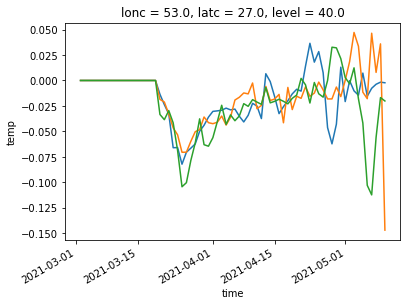

In [19]:
(ds_sur_era_v8s1.temp.isel(level=0,time=slice(60,130)).sel(lonc=51,latc=27)-ds_sur_era_v8s4.temp.isel(level=0,time=slice(1,200)).sel(lonc=51,latc=27)).plot()
(ds_sur_era_v8s1.temp.isel(level=0,time=slice(60,130)).sel(lonc=52,latc=27)-ds_sur_era_v8s4.temp.isel(level=0,time=slice(1,200)).sel(lonc=52,latc=27)).plot()
(ds_sur_era_v8s1.temp.isel(level=0,time=slice(60,130)).sel(lonc=53,latc=27)-ds_sur_era_v8s4.temp.isel(level=0,time=slice(1,200)).sel(lonc=53,latc=27)).plot()

In [302]:
diff_ds_sur_era_temp = ds_sur_era_v8s1.temp-ds_sur_era_v8s4.temp

diff_ds_sur_era_temp_mean = -diff_ds_sur_era_temp.sel(lonc=slice(47.6,56.2)).mean(dim='lonc').mean(dim='latc')

In [303]:
# diff_ds_sur_era_temp_mean_smooth = diff_ds_sur_era_temp_mean.rolling(time=3,center=True).mean().dropna("time")
# diff_ds_sur_era_temp_mean_smooth_array = diff_ds_sur_era_temp_mean_smooth.values
diff_ds_sur_era_temp_mean_smooth_array = diff_ds_sur_era_temp_mean.values

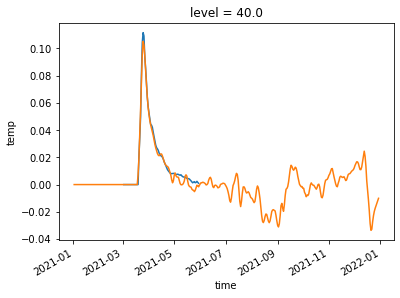

In [304]:
diff_ds_sur_era_temp_mean.isel(time=slice(60,150)).plot()
diff_ds_sur_era_temp_mean_smooth.plot()

In [307]:
indx_str = np.where(diff_ds_sur_era_temp_mean_smooth_array==0)[0][-1]
indx_mid = np.argmax(diff_ds_sur_era_temp_mean_smooth_array)
indx_end = np.where(diff_ds_sur_era_temp_mean_smooth_array<0)[0][0]
# zero_last

In [308]:
print(indx_str)
print(indx_mid)
print(indx_end)

77
83
152


In [309]:
# temp_mean_t1 = diff_ds_sur_era_temp_mean.isel(time=slice(indx_str+1,indx_mid+1))
# temp_mean_t2 = diff_ds_sur_era_temp_mean.isel(time=slice(indx_mid,indx_end))

temp_mean_t1 = diff_ds_sur_era_temp_mean.isel(time=slice(indx_str+1,indx_mid+1))
temp_mean_t2 = diff_ds_sur_era_temp_mean.isel(time=slice(indx_mid,indx_end))

x_t1 = np.arange(1,indx_mid-indx_str+1)
x_t2 = np.arange(1,indx_end-indx_mid+1)

xx_t1 = np.arange(indx_str+1,indx_mid+1)
xx_t2 = np.arange(indx_mid,indx_end)

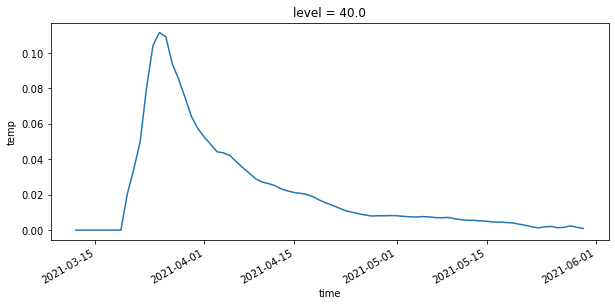

In [320]:
r1_mean = diff_ds_sur_era_temp_mean.rolling(time=3, center=True).mean()
fig, ax1 = plt.subplots(figsize=(10,4))
diff_ds_sur_era_temp_mean.isel(time=slice(70,150)).where(diff_ds_sur_era_temp_mean.isel(time=slice(70,150))>=-0).plot()
# r1_mean.isel(time=slice(60,150)).where(r1_mean.isel(time=slice(60,150))>=0).plot()

In [321]:
coef_t1 = np.polyfit(x_t1,np.log(temp_mean_t1),1)
temp_mean_t1_ln_reg = coef_t1[0]*x_t1+coef_t1[1]
temp_mean_t1_reg = np.exp(coef_t1[0]*x_t1+coef_t1[1])

coef_t2 = np.polyfit(x_t2,np.log(temp_mean_t2),1)
temp_mean_t2_ln_reg = coef_t2[0]*x_t2+coef_t2[1]
temp_mean_t2_reg = np.exp(coef_t2[0]*x_t2+coef_t2[1])

In [322]:
1/coef_t1[0]

array([2.84713211])

In [324]:
coef_t1[1]

array([-4.10197129])

In [323]:
-1/coef_t2[0]

array([16.20622634])

In [325]:
coef_t2[1]

array([-2.41871796])

## Version 2
## of the regression process

In [291]:
## Version 1 of the regression process
# diff_ds_sur_era_temp_smooth = (-diff_ds_sur_era_temp).rolling(time=3,center=True).mean().isel(level=0)
diff_ds_sur_era_temp_smooth = (-diff_ds_sur_era_temp).isel(level=0)
diff_ds_sur_era_temp_smooth_differentiate = diff_ds_sur_era_temp_smooth.differentiate('time')

# temp_t1 = -diff_ds_sur_era_temp.isel(level=0,time=slice(indx_str+1,indx_mid+1))
# temp_t2 = -diff_ds_sur_era_temp.isel(level=0,time=slice(indx_mid,indx_end))

coef_grid_t1 = np.zeros((diff_ds_sur_era_temp_smooth.shape[1],diff_ds_sur_era_temp_smooth.shape[2],2));
coef_grid_t2 = np.zeros((diff_ds_sur_era_temp_smooth.shape[1],diff_ds_sur_era_temp_smooth.shape[2],2));

tmax_dep = np.zeros((diff_ds_sur_era_temp_smooth.shape[1],diff_ds_sur_era_temp_smooth.shape[2]));
time_dep = np.zeros((diff_ds_sur_era_temp_smooth.shape[1],diff_ds_sur_era_temp_smooth.shape[2],2));
for i in np.arange(diff_ds_sur_era_temp_smooth.shape[1]):
    for j in np.arange(diff_ds_sur_era_temp_smooth.shape[2]):
        if ~np.isnan(diff_ds_sur_era_temp_smooth.isel(latc=i,lonc=j)[1]):
            ttmp_0 = diff_ds_sur_era_temp_smooth.isel(latc=i,lonc=j)
            tdif_0 = diff_ds_sur_era_temp_smooth_differentiate.isel(latc=i,lonc=j)

            # indx_str = np.where(ttmp_0.values==0)[0][-1]
            indx_str = np.where((ttmp_0.values!=0)&(~np.isnan(ttmp_0.values)))[0][0]-1
            indx_end = np.where(ttmp_0.values<0)[0][0]
            ###### version try 1
            # if np.where(tdif_0.values>1e-15)[0].size !=0:
            #     indx_en2 = np.where(tdif_0.values>1e-15)[0][0]
            #     if indx_en2<indx_end:
            #         indx_end = indx_en2
            ###### version try 2
            indx_tmp = np.where((tdif_0.values>1e-17) & (tdif_0.values<1e-16) & (ttmp_0.values<0.02)& (ttmp_0.values>0))[0]
            if indx_tmp.size >3:
                indx_en2 = indx_tmp[indx_tmp>indx_str+3][0]
                if indx_en2<indx_end:
                    indx_end = indx_en2
            indx_mid = np.nanargmax(ttmp_0[indx_str:indx_end])+indx_str
            tmax_dep[i,j] = np.nanmax(ttmp_0[indx_str:indx_end])

            ttmp_1 = ttmp_0.isel(time=slice(indx_str+1,indx_mid+1))
            ttmp_2 = ttmp_0.isel(time=slice(indx_mid,indx_end))

            x_t1 = np.arange(1,indx_mid-indx_str+1)
            x_t2 = np.arange(1,indx_end-indx_mid+1)
            time_dep[i,j,0] = x_t1.size
            time_dep[i,j,1] = x_t2.size

            # for period 1
            #  drop the values with negative
            # ttmp_1 = temp_t1.isel(latc=i,lonc=j)
            ktmp_1 = np.where(ttmp_1>0)
            if (x_t1.size!=0) & (ktmp_1[0].size!=0):
                m0 = np.polyfit(x_t1[ktmp_1],np.log(ttmp_1[ktmp_1]),1)
                coef_grid_t1[i,j,0] = m0[0]
                coef_grid_t1[i,j,1] = m0[1]
            # for period 2
            #  drop the values with negative
            # ttmp_2 = temp_t2.isel(latc=i,lonc=j)
            ktmp_2 = np.where(ttmp_2>0)
            if (x_t2.size!=0) & (ktmp_2[0].size!=0):
                m0 = np.polyfit(x_t2[ktmp_2],np.log(ttmp_2[ktmp_2]),1)
                coef_grid_t2[i,j,0] = m0[0]
                coef_grid_t2[i,j,1] = m0[1]
            # coef_grid_t2[i,j,0:1] = np.polyfit(x_t2,np.log(temp_t2.isel(latc=i,lonc=j)),1)

coef_grid_t1[coef_grid_t1==0] = np.nan
coef_grid_t1[coef_grid_t1==0] = np.nan
coef_grid_t2[coef_grid_t2==0] = np.nan
coef_grid_t2[coef_grid_t2==0] = np.nan
tmax_dep[tmax_dep==0] = np.nan

/home/ceoas/liux8/.conda/envs/scipy/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ceoas/liux8/.conda/envs/scipy/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ceoas/liux8/.conda/envs/scipy/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ceoas/liux8/.conda/envs/scipy/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ceoas/liux8/.conda/envs/scipy/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self

## v2 _test version

In [ ]:
## Version 2_ test of the regression process
# diff_ds_sur_era_temp_smooth = (-diff_ds_sur_era_temp).rolling(time=3,center=True).mean().isel(level=0)
# diff_ds_sur_era_temp_smooth = (-diff_ds_sur_era_temp).isel(level=0)
# diff_ds_sur_era_temp_smooth_differentiate = diff_ds_sur_era_temp_smooth.differentiate('time')

diff_ds_sur_era_temp_smooth_test0 = (-diff_ds_sur_era_temp).rolling(time=8,center=True).mean()
diff_ds_sur_era_temp_smooth_differentiate_test0 = diff_ds_sur_era_temp_smooth_test0.differentiate('time')

# temp_t1 = -diff_ds_sur_era_temp.isel(level=0,time=slice(indx_str+1,indx_mid+1))
# temp_t2 = -diff_ds_sur_era_temp.isel(level=0,time=slice(indx_mid,indx_end))

coef_grid_t1 = np.zeros((diff_ds_sur_era_temp_smooth.shape[1],diff_ds_sur_era_temp_smooth.shape[2],2));
coef_grid_t2 = np.zeros((diff_ds_sur_era_temp_smooth.shape[1],diff_ds_sur_era_temp_smooth.shape[2],2));

tmax_dep = np.zeros((diff_ds_sur_era_temp_smooth.shape[1],diff_ds_sur_era_temp_smooth.shape[2]));
time_dep = np.zeros((diff_ds_sur_era_temp_smooth.shape[1],diff_ds_sur_era_temp_smooth.shape[2],2));
for i in np.arange(diff_ds_sur_era_temp_smooth.shape[1]):
    for j in np.arange(diff_ds_sur_era_temp_smooth.shape[2]):
        if ~np.isnan(diff_ds_sur_era_temp_smooth.isel(latc=i,lonc=j)[1]):
            ttmp_0 = diff_ds_sur_era_temp_smooth.isel(latc=i,lonc=j)
            tdif_0 = diff_ds_sur_era_temp_smooth_differentiate_test0.isel(latc=i,lonc=j)

            # indx_str = np.where(ttmp_0.values==0)[0][-1]
            indx_str = np.where((ttmp_0.values!=0)&(~np.isnan(ttmp_0.values)))[0][0]-1
            indx_end = np.where(ttmp_0.values<0)[0][0]
            indx_end = min(indx_end,120)
            ###### version try 1
            # if np.where(tdif_0.values>1e-15)[0].size !=0:
            #     indx_en2 = np.where(tdif_0.values>1e-15)[0][0]
            #     if indx_en2<indx_end:
            #         indx_end = indx_en2
            ###### version try 2
            # indx_tmp = np.where((tdif_0.values>1e-17) & (tdif_0.values<1e-16) & (ttmp_0.values<0.02)& (ttmp_0.values>0))[0]
            indx_tmp = np.where(np.abs(tdif_0.values)<0.2e-16)[0]
            # indx_en2 = indx_tmp[np.where(indx_tmp>indx_str)[0][0]]
            # if indx_tmp.size >3:
                # indx_en2 = indx_tmp[indx_tmp>indx_str+3][0]
            # if indx_en2<indx_end:
            #     indx_end = indx_en2
            indx_mid = np.nanargmax(ttmp_0[indx_str:indx_end])+indx_str
            indx_en2 = indx_tmp[np.where(indx_tmp>indx_mid)[0][0]]
            if indx_en2<indx_end:
                indx_end = indx_en2
            tmax_dep[i,j] = np.nanmax(ttmp_0[indx_str:indx_end])

            ttmp_1 = ttmp_0.isel(time=slice(indx_str+1,indx_mid+1))
            ttmp_2 = ttmp_0.isel(time=slice(indx_mid,indx_end))

            x_t1 = np.arange(1,indx_mid-indx_str+1)
            x_t2 = np.arange(1,indx_end-indx_mid+1)
            time_dep[i,j,0] = x_t1.size
            time_dep[i,j,1] = x_t2.size

            # for period 1
            #  drop the values with negative
            # ttmp_1 = temp_t1.isel(latc=i,lonc=j)
            ktmp_1 = np.where(ttmp_1>0)
            if (x_t1.size!=0) & (ktmp_1[0].size!=0):
                m0 = np.polyfit(x_t1[ktmp_1[0]],np.log(ttmp_1[ktmp_1[0]]),1)
                coef_grid_t1[i,j,0] = m0[0]
                coef_grid_t1[i,j,1] = m0[1]
            # for period 2
            #  drop the values with negative
            # ttmp_2 = temp_t2.isel(latc=i,lonc=j)
            ktmp_2 = np.where(ttmp_2>0)
            if (x_t2.size!=0) & (ktmp_2[0].size!=0):
                m0 = np.polyfit(x_t2[ktmp_2[0]],np.log(ttmp_2[ktmp_2[0]]),1)
                coef_grid_t2[i,j,0] = m0[0]
                coef_grid_t2[i,j,1] = m0[1]
            # coef_grid_t2[i,j,0:1] = np.polyfit(x_t2,np.log(temp_t2.isel(latc=i,lonc=j)),1)

coef_grid_t1[coef_grid_t1==0] = np.nan
coef_grid_t1[coef_grid_t1==0] = np.nan
coef_grid_t2[coef_grid_t2==0] = np.nan
coef_grid_t2[coef_grid_t2==0] = np.nan
tmax_dep[tmax_dep==0] = np.nan

/home/ceoas/liux8/.conda/envs/scipy/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'linewidth'
  after removing the cwd from sys.path.


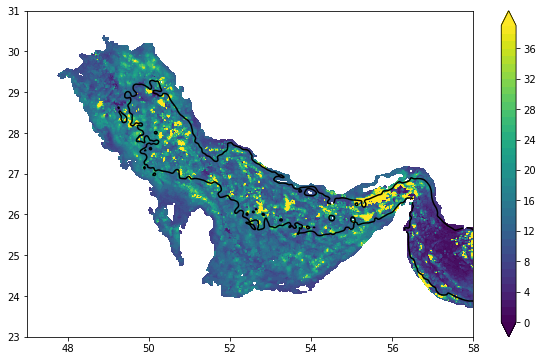

In [326]:
fig, ax1 = plt.subplots(figsize=(10,6))
plt.contourf(diff_ds_sur_era_temp_smooth.lonc,diff_ds_sur_era_temp_smooth.latc,-1/coef_grid_t2[:,:,0],levels=np.arange(0,40,1),extend='both')
plt.colorbar()
plt.contour(ds_topo.lon,ds_topo.lat,ds_topo.bathymetry,levels=np.arange(40,60,20),colors='k',linewidth=0.1)

/home/ceoas/liux8/.conda/envs/scipy/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'linewidth'
  after removing the cwd from sys.path.


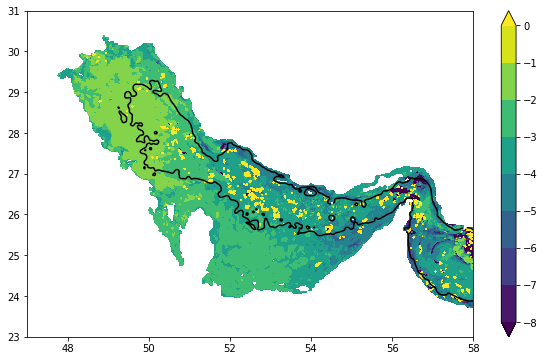

In [335]:
fig, ax1 = plt.subplots(figsize=(10,6))
plt.contourf(diff_ds_sur_era_temp_smooth.lonc,diff_ds_sur_era_temp_smooth.latc,-1/coef_grid_t1[:,:,0],levels=np.arange(-8,1,1),extend='both')
plt.colorbar()
plt.contour(ds_topo.lon,ds_topo.lat,ds_topo.bathymetry,levels=np.arange(40,60,20),colors='k',linewidth=0.1)

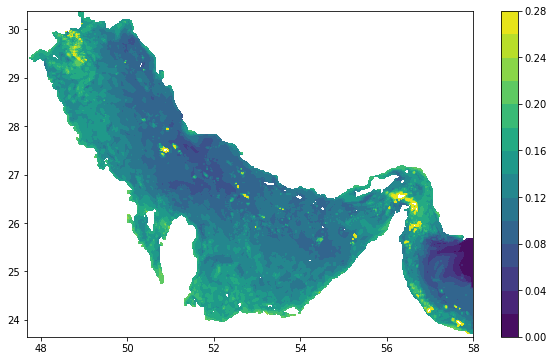

In [112]:
fig, ax1 = plt.subplots(figsize=(10,6))
plt.contourf(diff_ds_sur_era_temp_smooth.lonc,diff_ds_sur_era_temp_smooth.latc,tmax_dep,levels=np.arange(0,0.3,0.02))
plt.colorbar()

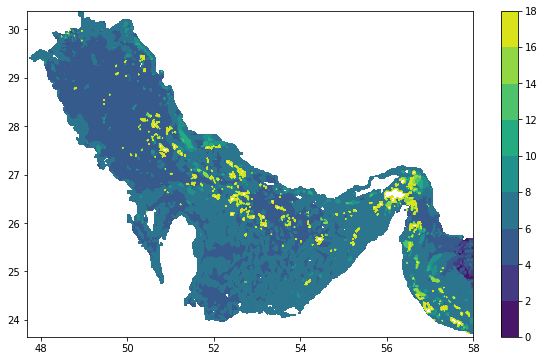

In [113]:
time_dep[time_dep==0]=np.nan
fig, ax1 = plt.subplots(figsize=(10,6))
plt.contourf(diff_ds_sur_era_temp_smooth.lonc,diff_ds_sur_era_temp_smooth.latc,time_dep[:,:,0],levels=np.arange(0,20,2))
plt.colorbar()

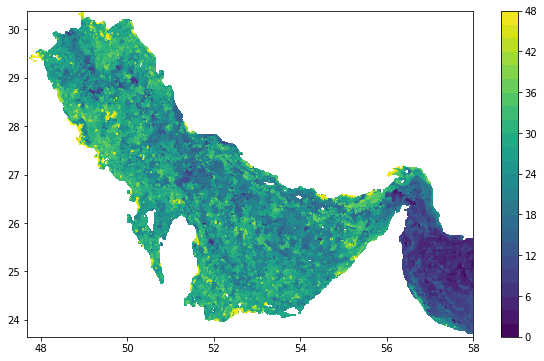

In [115]:
fig, ax1 = plt.subplots(figsize=(10,6))
plt.contourf(diff_ds_sur_era_temp_smooth.lonc,diff_ds_sur_era_temp_smooth.latc,time_dep[:,:,1],levels=np.arange(0,50,2))
plt.colorbar()

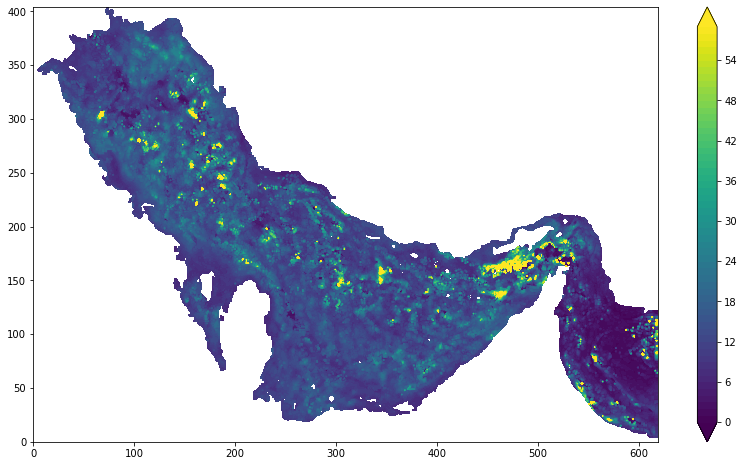

In [78]:
fig, ax1 = plt.subplots(figsize=(14,8))
plt.contourf(-1/coef_grid_t2[:,:,0],levels=np.arange(0,60,1),extend='both')
plt.colorbar()

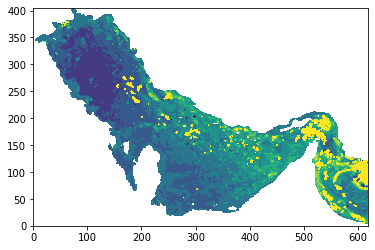

In [63]:
plt.contourf(1/coef_grid_t1[:,:,0],levels=np.arange(0,10,1),extend='both')

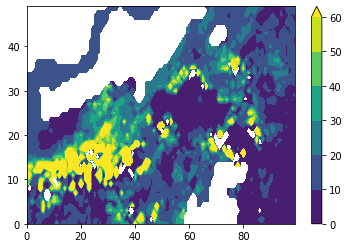

In [79]:
plt.contourf(-1/coef_grid_t2[150:200,450:550,0],levels=np.arange(0,70,10),extend='max')
plt.colorbar()

In [80]:
-1/coef_grid_t2[165,468,0]

314.68649318464344

### section: test case

In [246]:
diff_ds_sur_era_temp_smooth_test0 = (-diff_ds_sur_era_temp).rolling(time=8,center=True).mean()
diff_ds_sur_era_temp_smooth_differentiate_test0 = diff_ds_sur_era_temp_smooth_test0.differentiate('time')

In [339]:
i=165
j=468

# ttmp_0 = (-diff_ds_sur_era_temp).rolling(time=3,center=True).mean().isel(level=0)
ttmp_0 = (-diff_ds_sur_era_temp).isel(latc=i,lonc=j)
tdif_0 = diff_ds_sur_era_temp_smooth_differentiate_test0.isel(latc=i,lonc=j)

# indx_str = np.where(ttmp_0.values==0)[0][-1]
indx_str = np.where((ttmp_0.values!=0)&(~np.isnan(ttmp_0.values)))[0][0]-1
indx_end = np.where(ttmp_0.values<0)[0][0]
indx_end = min(indx_end,120)
###### version try 1
# if np.where(tdif_0.values>1e-15)[0].size !=0:
#     indx_en2 = np.where(tdif_0.values>1e-15)[0][0]
#     if indx_en2<indx_end:
#         indx_end = indx_en2
###### version try 2
# indx_tmp = np.where((tdif_0.values>1e-17) & (tdif_0.values<1e-16) & (ttmp_0.values<0.02)& (ttmp_0.values>0))[0]
indx_tmp = np.where(np.abs(tdif_0.values)<0.2e-16)[0]
# indx_en2 = indx_tmp[np.where(indx_tmp>indx_str)[0][0]]
# if indx_tmp.size >3:
    # indx_en2 = indx_tmp[indx_tmp>indx_str+3][0]
# if indx_en2<indx_end:
#     indx_end = indx_en2
indx_mid = np.nanargmax(ttmp_0[indx_str:indx_end])+indx_str
indx_en2 = indx_tmp[np.where(indx_tmp>indx_mid)[0][0]]
if indx_en2<indx_end:
    indx_end = indx_en2
tmax_dep = np.nanmax(ttmp_0[indx_str:indx_end])
print(indx_tmp[np.where(indx_tmp>indx_str)[0]])

print(indx_str)
print(indx_mid)
print(indx_end)

ttmp_1 = ttmp_0.isel(time=slice(indx_str+1,indx_mid+1))
ttmp_2 = ttmp_0.isel(time=slice(indx_mid,indx_end))

x_t1 = np.arange(1,indx_mid-indx_str+1)
x_t2 = np.arange(1,indx_end-indx_mid+1)

# for period 1
#  drop the values with negative
# ttmp_1 = temp_t1.isel(latc=i,lonc=j)
ktmp_1 = np.where(ttmp_1>0)
if (x_t1.size!=0) & (ktmp_1[0].size!=0):
    m0 = np.polyfit(x_t1[ktmp_1[0]],np.log(ttmp_1[ktmp_1[0]]),1)
    coef_grid_t1[i,j,0] = m0[0]
    coef_grid_t1[i,j,1] = m0[1]
# for period 2
#  drop the values with negative
# ttmp_2 = temp_t2.isel(latc=i,lonc=j)
ktmp_2 = np.where(ttmp_2>0)
if (x_t2.size!=0) & (ktmp_2[0].size!=0):
    m0 = np.polyfit(x_t2[ktmp_2[0]],np.log(ttmp_2[ktmp_2[0]]),1)
    coef_grid_t2[i,j,0] = m0[0]
    coef_grid_t2[i,j,1] = m0[1]

# print(tmax_dep)

[ 85  92  93  94  95  96  97  98  99 100 101 109 110 111 134 138 158 166
 192 193 211 212 215 267 332 354 355 359]
77
85
92


In [267]:
1/coef_grid_t1[i,j,:]

array([ 4.3028778 , -0.25404534])

In [268]:
-1/coef_grid_t2[i,j,:]

array([4.60449692, 0.45824867])

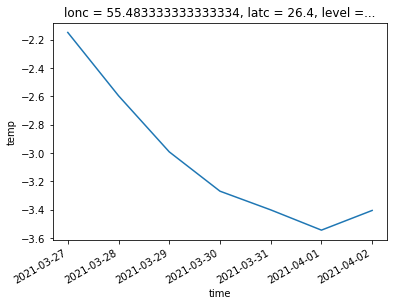

In [270]:
np.log(ttmp_2).plot()
# ttmp_0.isel(time=slice(77,100)).plot()
# ttmp_0.isel(time=slice(77,90)).plot()

In [341]:
a00 = ttmp_0.isel(time=slice(70,130))

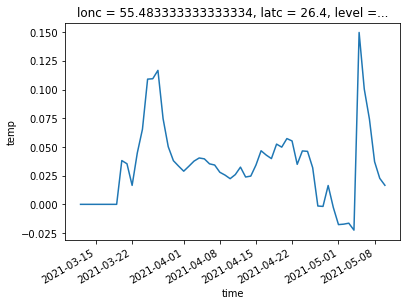

In [342]:
a01 = a00.rolling(time=8,center=True).mean()
a00.plot()
# a01.plot()

da00 = a00.differentiate("time")
# da01 = a01.differentiate("time")

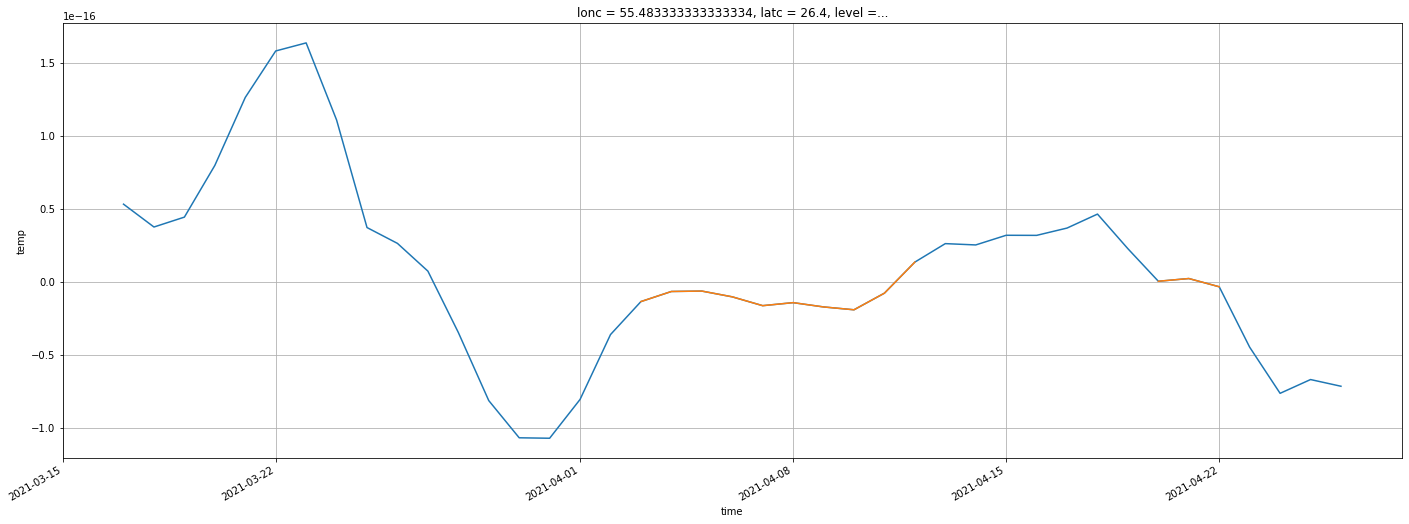

In [257]:
fig, ax1 = plt.subplots(figsize=(24,8))
# ttmp_0.plot()
# tdif_0[indx_str:indx_end].plot()
plt.grid()
# da00.plot()
da01.plot()
da01.where(np.abs(da01)<0.2e-16).plot()

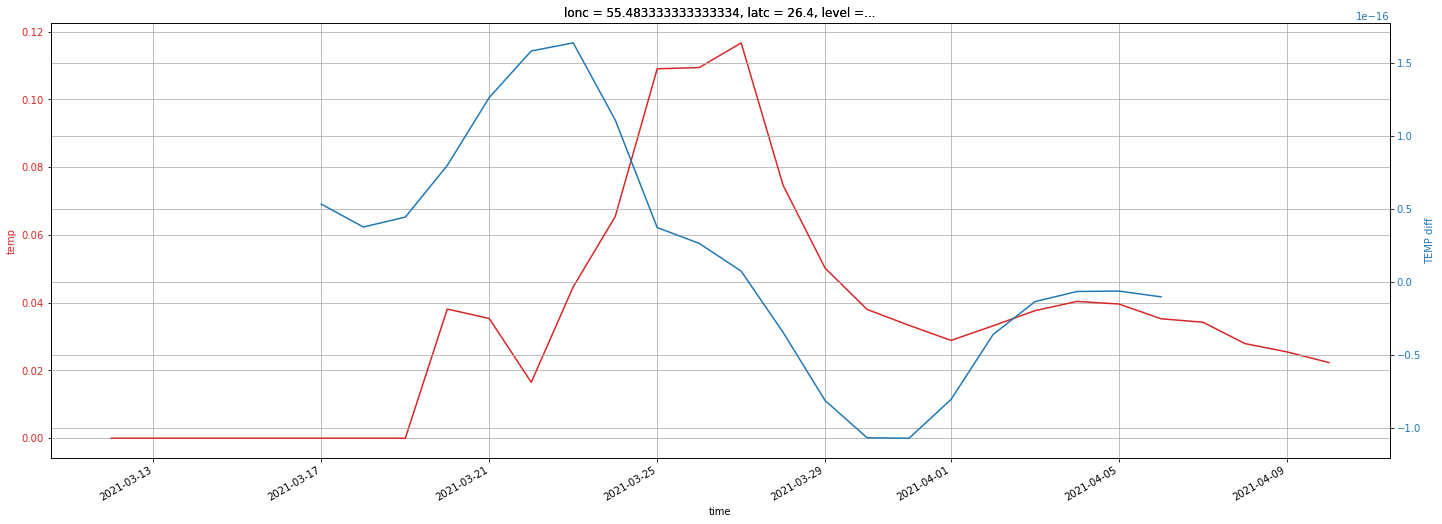

In [283]:
fig, ax1 = plt.subplots(figsize=(24,8))

color = 'tab:red'
ax1.set_ylabel('TEMP', color=color)
a00.plot(ax=ax1,color=color)
# a01.plot(ax=ax1,color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
# ax2.set_ylabel('TEMP diff', color=color)
# da00.plot(ax=ax2,color=color)
da01.plot(ax=ax2,color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('TEMP diff', color=color)
# plt.grid()
plt.grid()

In [126]:
-1/coef_grid_t2[i,j,:]

array([3.14686493e+02, 3.12341272e-01])

In [128]:
ktmp_1

(array([], dtype=int64), array([], dtype=int64))

In [127]:
plt.plot(x_t1[ktmp_1],np.log(ttmp_1[ktmp_1]))
# m0
coef_grid_t1[i,j,0]
m0[0]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

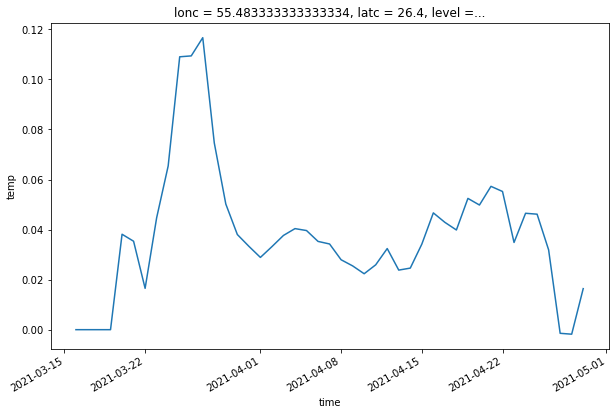

In [121]:
fig, ax1 = plt.subplots(figsize=(10,6))
# ttmp_0.plot()
# tdif_0[indx_str:indx_end].plot()
ttmp_0[indx_str-3:indx_end+3].plot()
# ttmp_0[indx_str:108].plot()
# ttmp_0[indx_str:96].plot()
# ttmp_0.isel(time=slice(indx_str-20,indx_end+20)).plot()
# temp_mean_t1.plot()
# temp_mean_t2.plot(color='r')

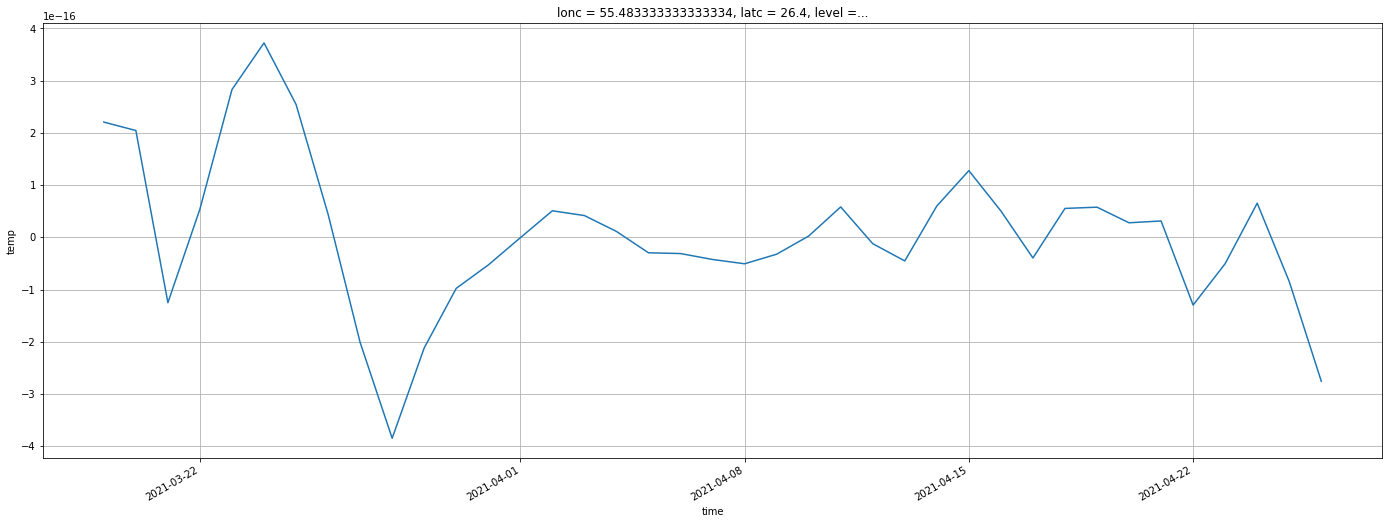

In [122]:
fig, ax1 = plt.subplots(figsize=(24,8))
# ttmp_0.plot()
tdif_0[indx_str:indx_end].plot()
plt.grid()

In [506]:
print(indx_str)
print(indx_mid)
print(indx_end)
print(indx_en2)

179
84
144
102


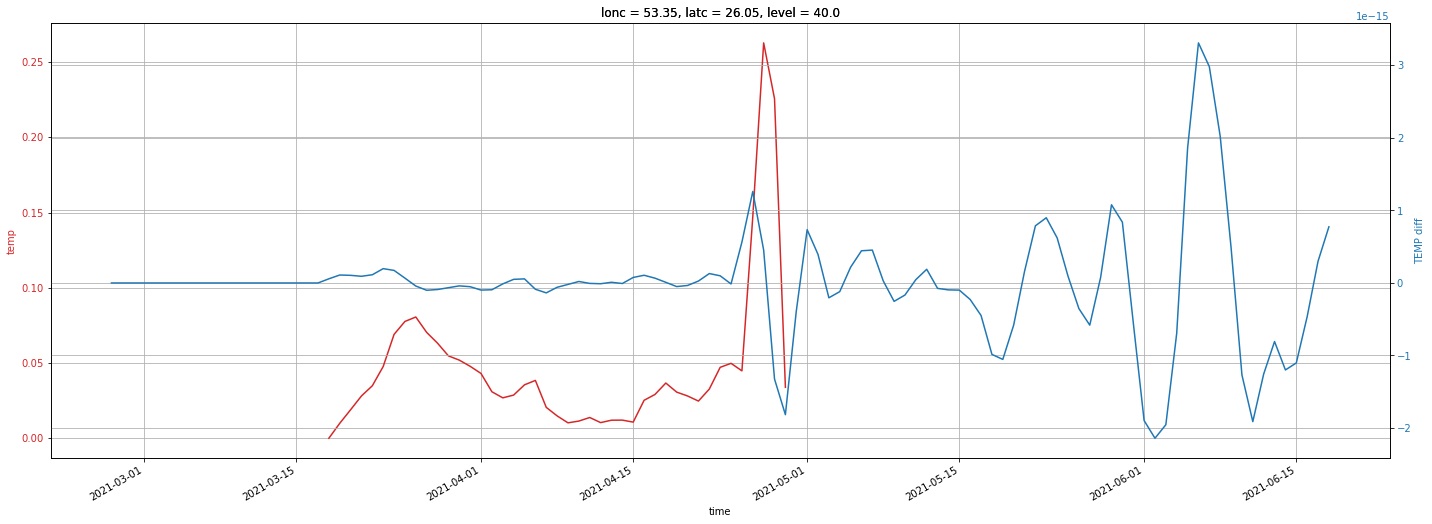

In [441]:
# ttmp_0.plot()
# ttmp_0.isel(time=slice(indx_str-20,indx_end+50)).plot()

# # ttmp_0.isel(time=slice(indx_str,indx_end))
# ttmp_0.isel(time=slice(indx_str-20,indx_end+50)).differentiate("time").plot()
# [l[i] - l[i - 1] for i in range(1, len(l))]

fig, ax1 = plt.subplots(figsize=(24,8))

color = 'tab:red'
ax1.set_ylabel('TEMP', color=color)
ttmp_0.isel(time=slice(indx_str,indx_end)).plot(ax=ax1,color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
# ax2.set_ylabel('TEMP diff', color=color)
ttmp_0.isel(time=slice(indx_str-20,indx_end+50)).differentiate("time").plot(ax=ax2,color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('TEMP diff', color=color)
# plt.grid()
plt.grid()

# fig.tight_layout()  # otherwise the right y-label is slightly clipped

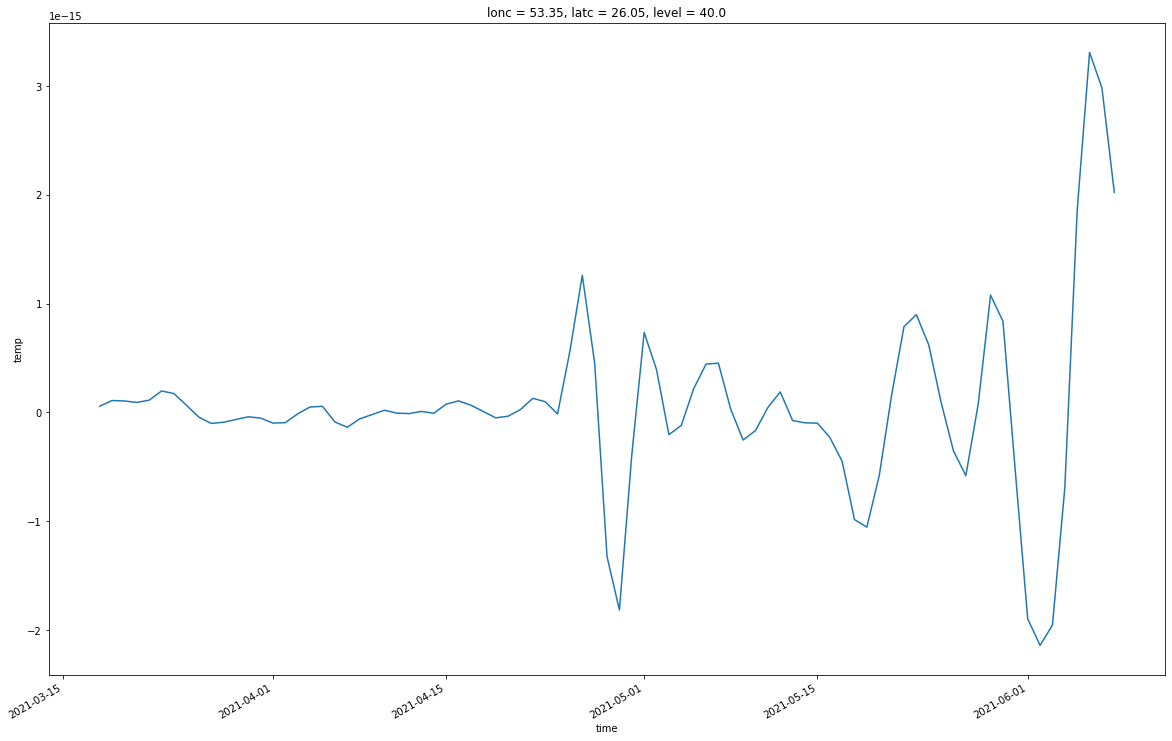

In [440]:
fig,ax=plt.subplots(figsize=(20,12))

ttmp_0.differentiate("time").isel(time=slice(indx_str,indx_end+40)).plot()

In [380]:
diff_ds_sur_era_temp_smooth.shape[2]

620

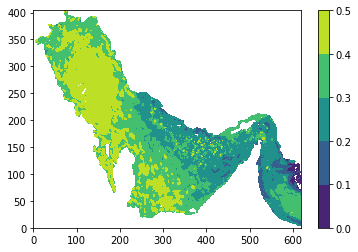

In [241]:
plt.contourf(coef_grid_t1[:,:,0],levels=np.arange(0,0.6,0.1))
plt.colorbar()

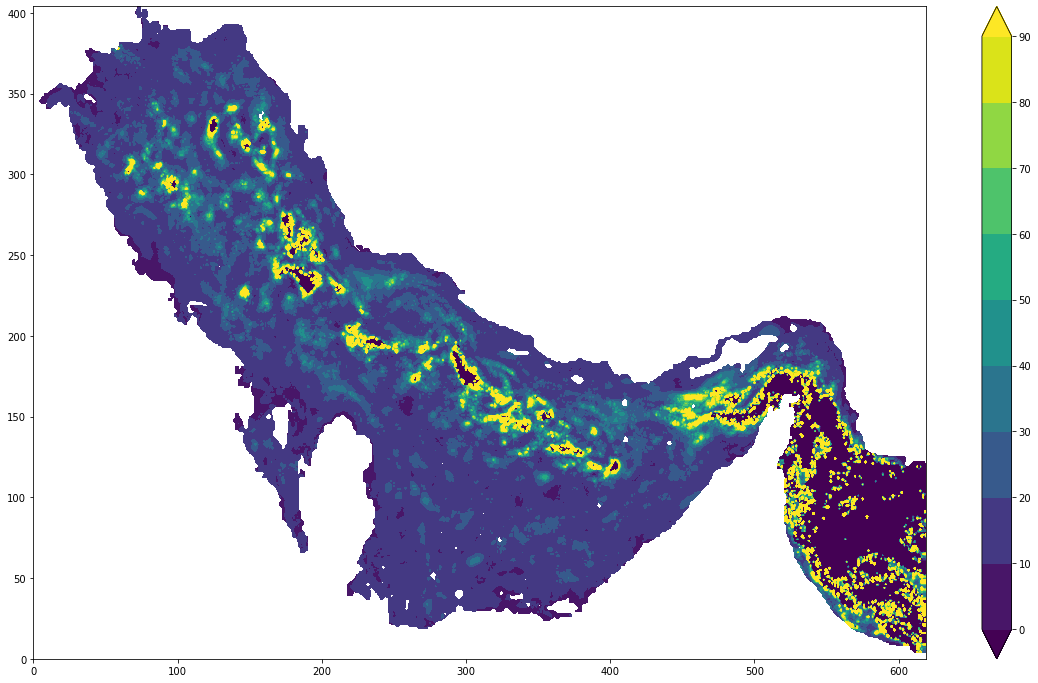

In [260]:
fig,ax=plt.subplots(figsize=(20,12))
# plt.contourf(coef_grid_t2[:,:,0],levels=np.arange(-0.2,0.02,0.01))
plt.contourf(-1/coef_grid_t2[:,:,0],levels=np.arange(0,100,10),extend='both')
plt.colorbar()

-305.62389864167153

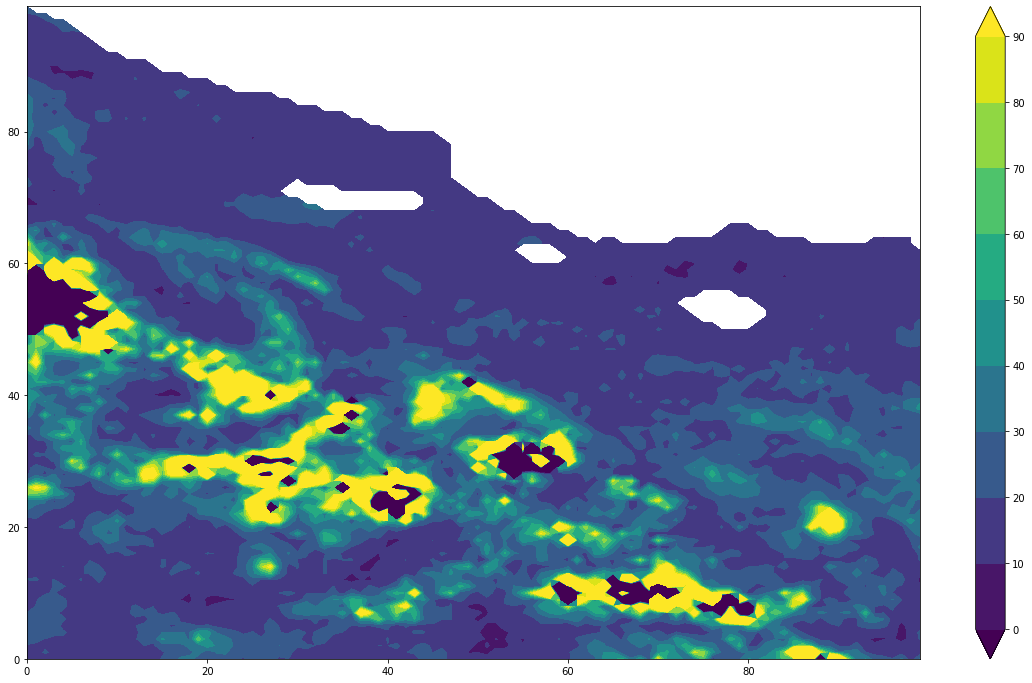

In [284]:
fig,ax=plt.subplots(figsize=(20,12))
# plt.contourf(coef_grid_t2[:,:,0],levels=np.arange(-0.2,0.02,0.01))
plt.contourf(-1/coef_grid_t2[120:220,300:400,0],levels=np.arange(0,100,10),extend='both')
plt.colorbar()

-1/coef_grid_t2[144,340,0]

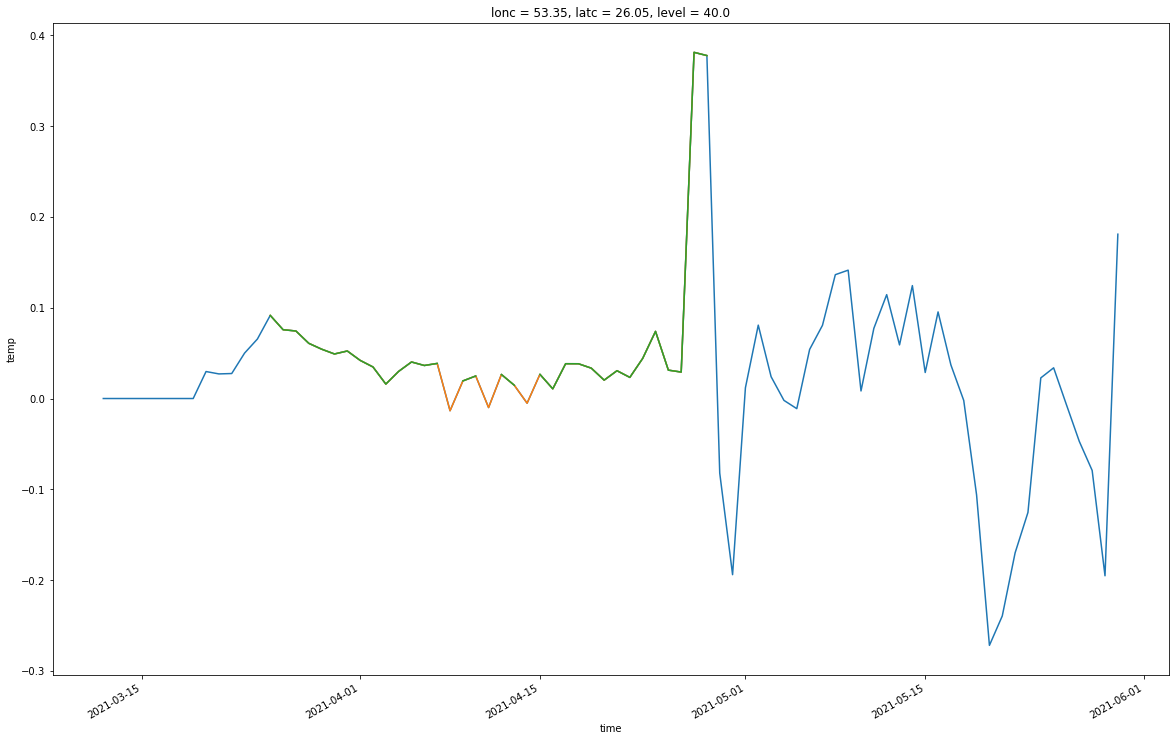

In [288]:
fig,ax=plt.subplots(figsize=(20,12))
(-diff_ds_sur_era_temp).isel(latc=144,lonc=340,time=slice(70,150)).plot()
temp_t2.isel(latc=144,lonc=340).plot()

temp_t2.isel(latc=144,lonc=340).where(temp_t2.isel(latc=144,lonc=340)>0).plot()

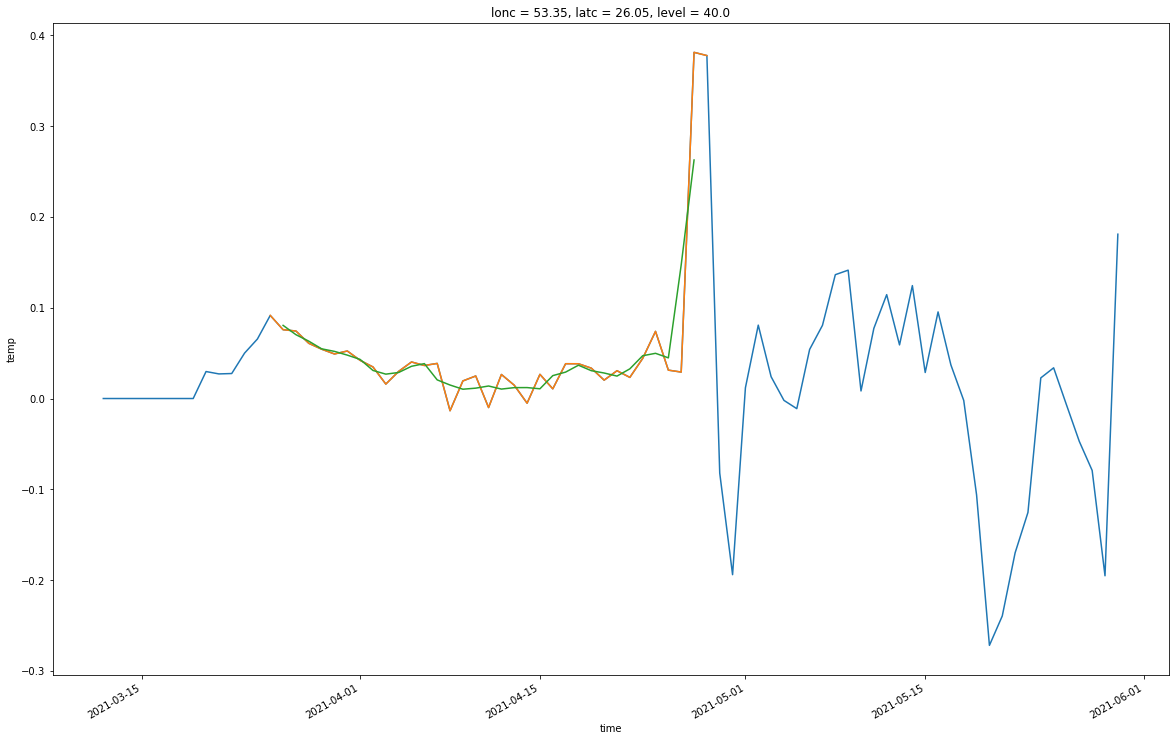

In [298]:
fig,ax=plt.subplots(figsize=(20,12))
(-diff_ds_sur_era_temp).isel(latc=144,lonc=340,time=slice(70,150)).plot()
r1 = temp_t2.isel(latc=144,lonc=340).rolling(time=3, center=True).mean()
temp_t2.isel(latc=144,lonc=340).plot()
r1.plot()

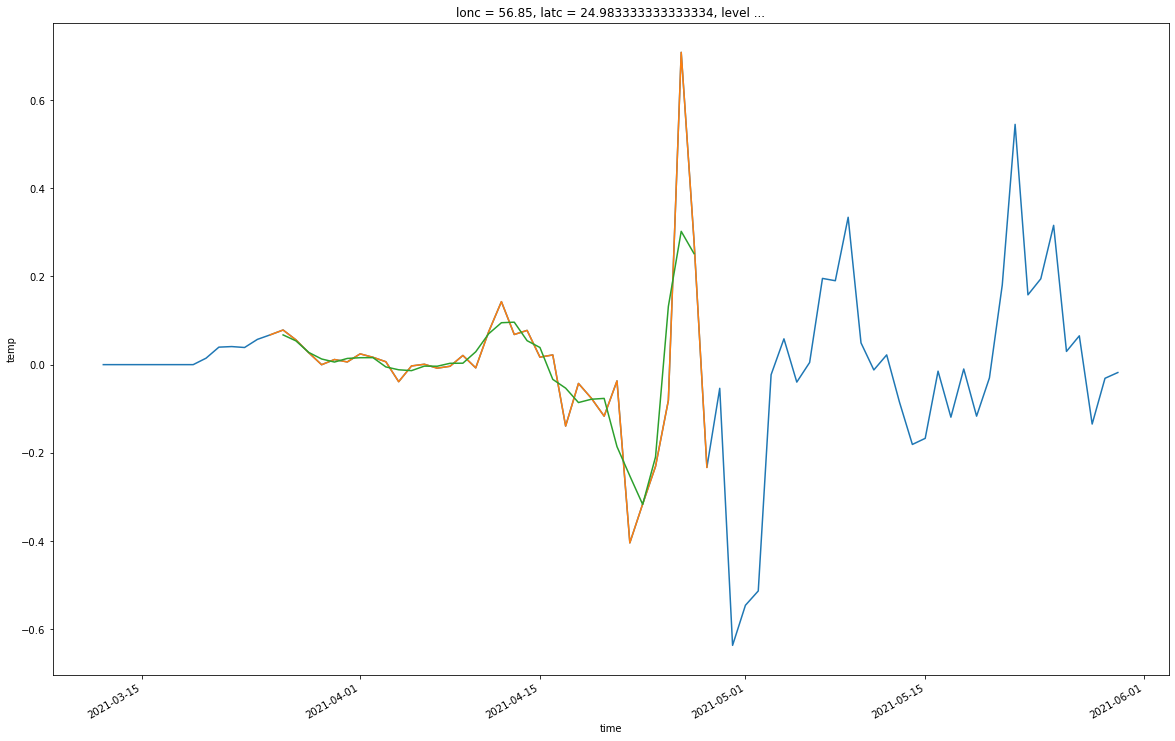

In [301]:
fig,ax=plt.subplots(figsize=(20,12))
(-diff_ds_sur_era_temp).isel(latc=80,lonc=550,time=slice(70,150)).plot()
r1 = temp_t2.isel(latc=80,lonc=550).rolling(time=3, center=True).mean()
temp_t2.isel(latc=80,lonc=550).plot()
r1.plot()

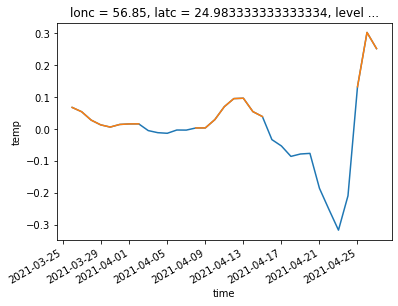

In [304]:
r1.plot()## Version 1 of the regression process
temp_t1 = -diff_ds_sur_era_temp.isel(level=0,time=slice(indx_str+1,indx_mid+1))
temp_t2 = -diff_ds_sur_era_temp.isel(level=0,time=slice(indx_mid,indx_end))

coef_grid_t1 = np.zeros((temp_t1.shape[1],temp_t1.shape[2],2));
coef_grid_t2 = np.zeros((temp_t1.shape[1],temp_t1.shape[2],2));
for i in np.arange(temp_t1.shape[1]):
    for j in np.arange(temp_t1.shape[2]):
        if ~np.isnan(temp_t1.isel(latc=i,lonc=j)[0]):
            # print(np.polyfit(x_t1,np.log(temp_t1.isel(latc=i,lonc=j)),1))
            # for period 1
            #  drop the values with negative
            ttmp_1 = temp_t1.isel(latc=i,lonc=j)
            ktmp_1 = np.where(ttmp_1>0)
            m0 = np.polyfit(x_t1[ktmp_1],np.log(ttmp_1[ktmp_1]),1)
            coef_grid_t1[i,j,0] = m0[0]
            coef_grid_t1[i,j,1] = m0[1]
            # for period 2
            #  drop the values with negative
            ttmp_2 = temp_t2.isel(latc=i,lonc=j)
            ktmp_2 = np.where(ttmp_2>0)
            m0 = np.polyfit(x_t2[ktmp_2],np.log(ttmp_2[ktmp_2]),1)
            coef_grid_t2[i,j,0] = m0[0]
            coef_grid_t2[i,j,1] = m0[1]
            # coef_grid_t2[i,j,0:1] = np.polyfit(x_t2,np.log(temp_t2.isel(latc=i,lonc=j)),1)

coef_grid_t1[coef_grid_t1==0] = np.nan
coef_grid_t1[coef_grid_t1==0] = np.nan
coef_grid_t2[coef_grid_t2==0] = np.nan
coef_grid_t2[coef_grid_t2==0] = np.nan
r1.where(r1>0).plot()

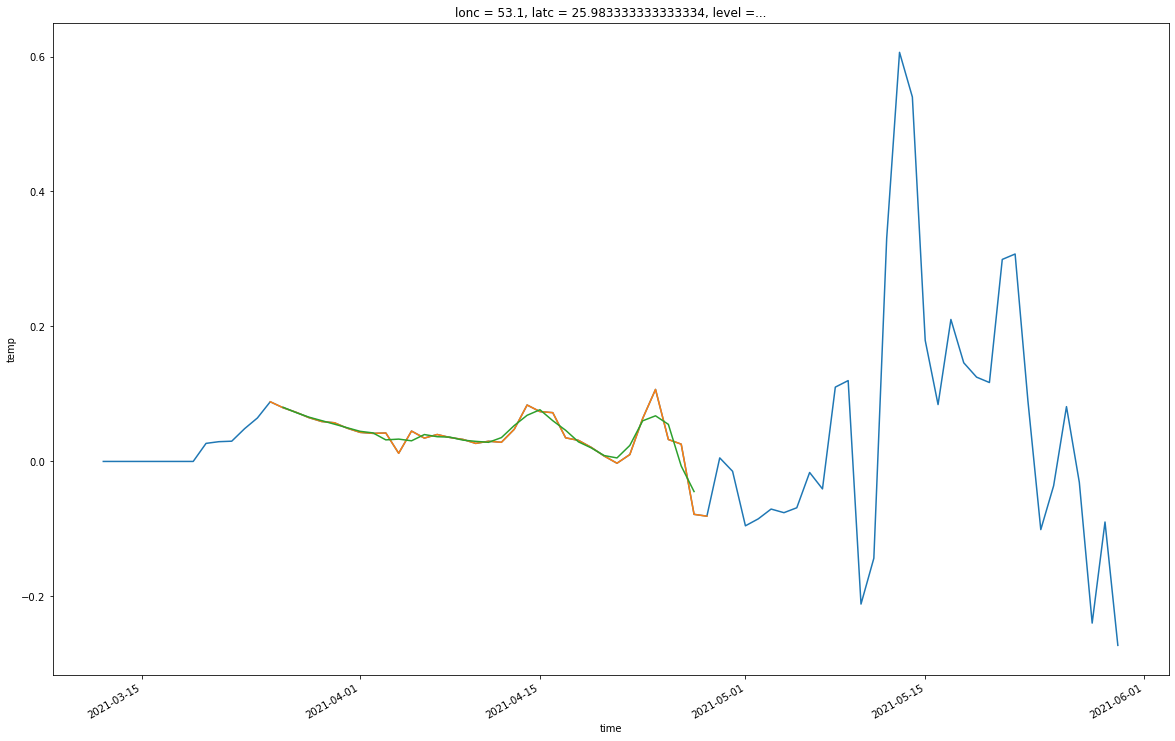

In [305]:
fig,ax=plt.subplots(figsize=(20,12))
(-diff_ds_sur_era_temp).iser1.plot()
r1.where(r1>0).plot()l(latc=140,lonc=325,time=slice(70,150)).plot()
temp_t2.isel(latc=140,lonc=325).plot()
r1 = temp_t2.isel(latc=140,lonc=325).rolling(time=3, center=True).mean()
r1.plot()

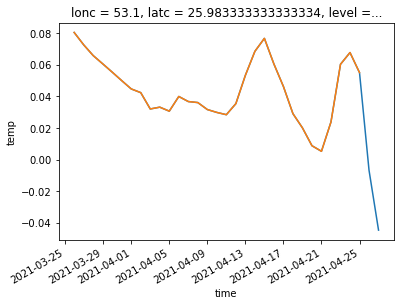

In [306]:
r1.plot()
r1.where(r1>0).plot()

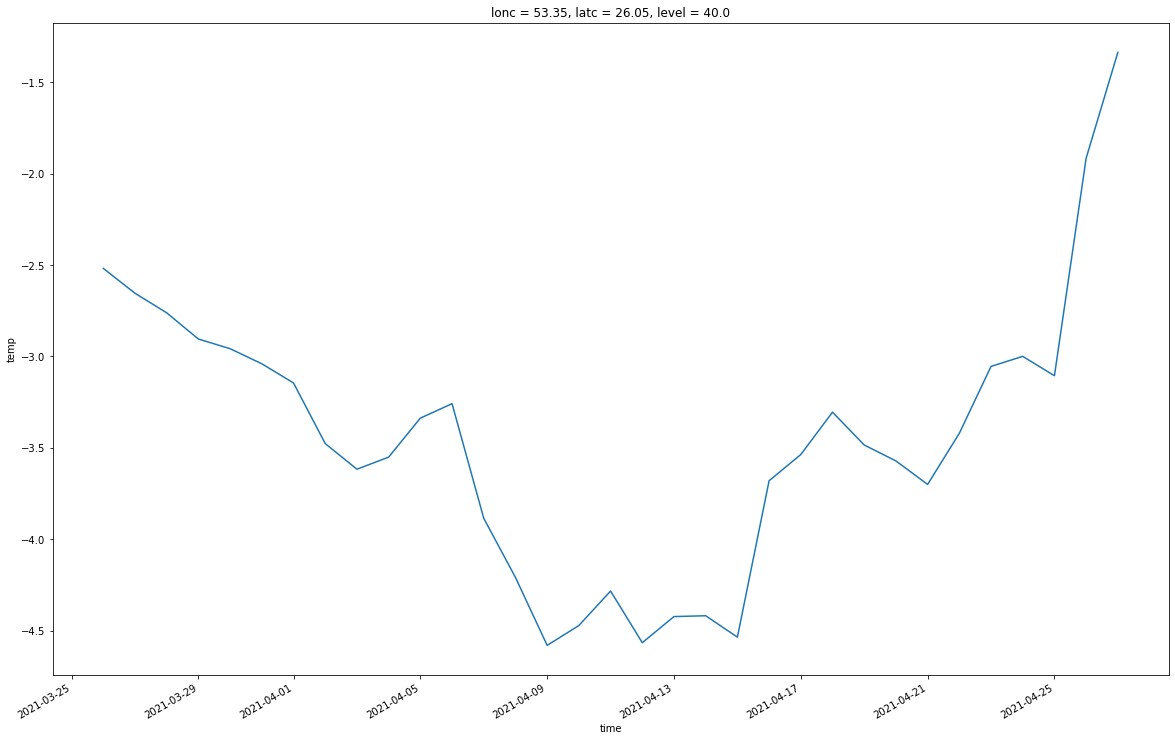

In [299]:
fig,ax=plt.subplots(figsize=(20,12))
np.log(r1).plot()

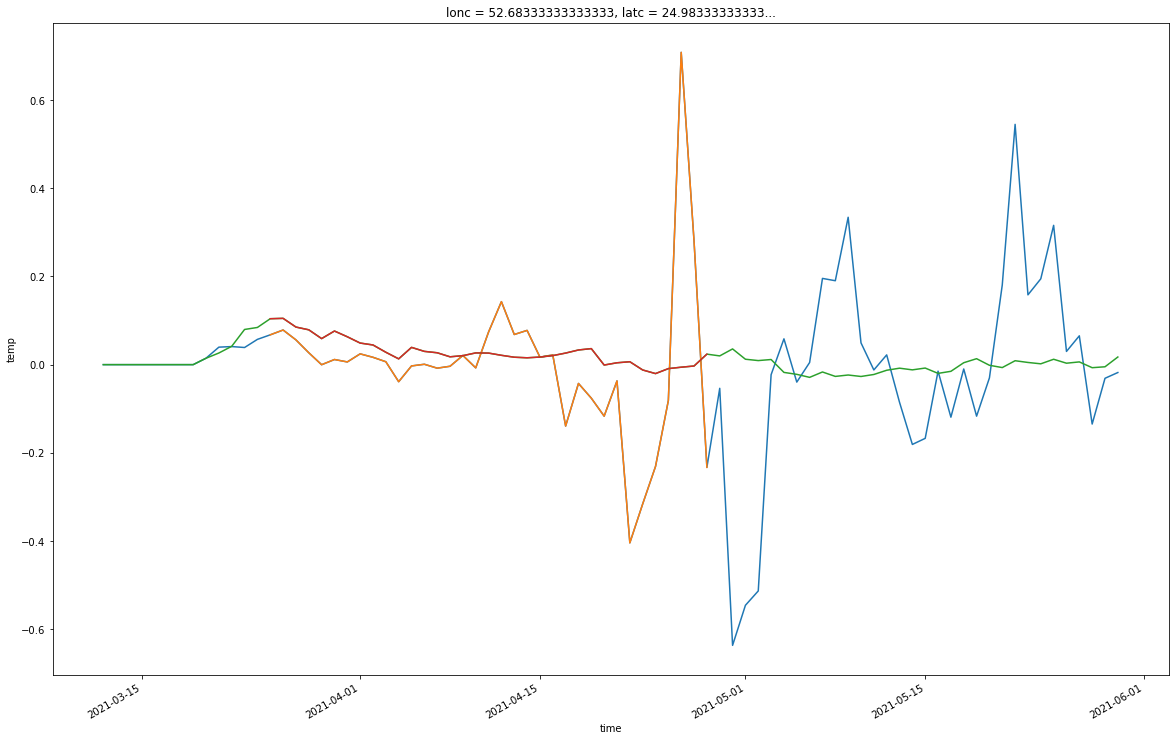

In [279]:
fig,ax=plt.subplots(figsize=(20,12))
(-diff_ds_sur_era_temp).isel(latc=80,lonc=550,time=slice(70,150)).plot()
temp_t2.isel(latc=80,lonc=550).plot()
(-diff_ds_sur_era_temp).isel(latc=80,lonc=300,time=slice(70,150)).plot()
temp_t2.isel(latc=80,lonc=300).plot()

In [ ]:
plt.contourf(coef_grid_t2[:,:,0],levels=np.arange(-0.2,0.02,0.01))
plt.colorbar()

In [222]:
ttmp_1 = temp_t1.isel(latc=i,lonc=j)

In [225]:
np.where(ttmp_1>0)[0]

array([1, 2, 3, 4, 5])

In [227]:
x_t1[np.where(ttmp_1>0)[0]]

array([2, 3, 4, 5, 6])

In [ ]:
ttmp_1[np.where(ttmp_1>0)[0]]

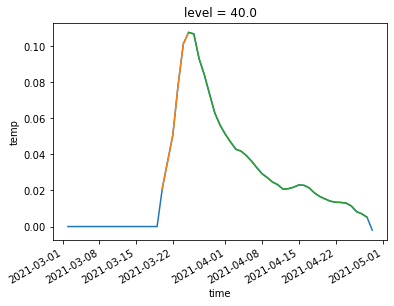

In [29]:
# diff_ds_sur_era_temp_mean.isel(time=slice(60,130)).plot()
diff_ds_sur_era_temp_mean.isel(time=slice(60,119)).plot()
temp_mean_t1.plot()
temp_mean_t2.plot()

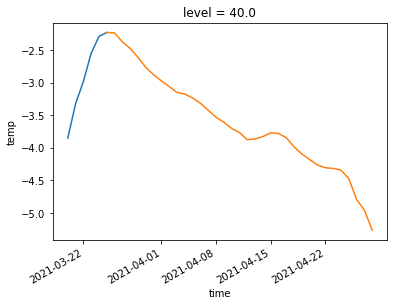

In [30]:
np.log(temp_mean_t1).plot()
np.log(temp_mean_t2).plot()

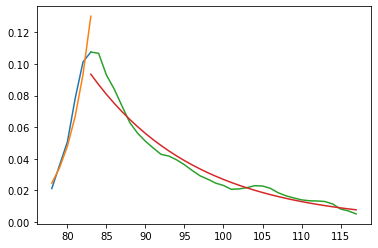

In [31]:
plt.plot(xx_t1,(temp_mean_t1))
plt.plot(xx_t1,temp_mean_t1_reg)

plt.plot(xx_t2,(temp_mean_t2))
plt.plot(xx_t2,temp_mean_t2_reg)


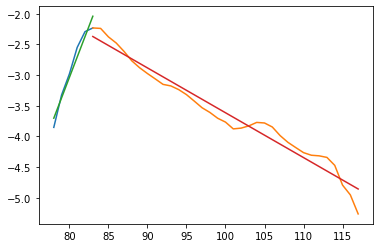

In [32]:
plt.plot(xx_t1,np.log(temp_mean_t1))
plt.plot(xx_t2,np.log(temp_mean_t2))
plt.plot(xx_t1,temp_mean_t1_ln_reg)
plt.plot(xx_t2,temp_mean_t2_ln_reg)

## 1.3 Reading 2d SWR and SHF

### 1.3.1 Reading SWR and SHF from output 2d files

In [6]:
datatype = '2d/PersianGulf_swr_shf.2d'
runname = '~/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v0/data_results_2021/'

data_name = runname+datatype
file_3d = data_name+'.nc'

print("  Opening %s  file "%file_3d)
ds_2d_era_v0 = xr.open_dataset(file_3d,mode='r')
##
runname = '/home/ceoas/liux8/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v8s1_newbnd/data_results_2021/';

data_name = runname+datatype
file_3d = data_name+'.nc'

print("  Opening %s  file "%file_3d)
ds_2d_era_v8s1 = xr.open_dataset(file_3d,mode='r')
##
runname = '/home/ceoas/liux8/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v8s4_newbnd/data_results_2021/';

data_name = runname+datatype
file_3d = data_name+'.nc'

print("  Opening %s  file "%file_3d)
ds_2d_era_v8s4 = xr.open_dataset(file_3d,mode='r')

  Opening ~/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v0/data_results_2021/2d/PersianGulf_swr_shf.2d.nc  file 
  Opening /home/ceoas/liux8/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v8s1_newbnd/data_results_2021/2d/PersianGulf_swr_shf.2d.nc  file 
  Opening /home/ceoas/liux8/GETM_shrad/getm/setups/era5frc_coldstart_01012017_era5v8s4_newbnd/data_results_2021/2d/PersianGulf_swr_shf.2d.nc  file 


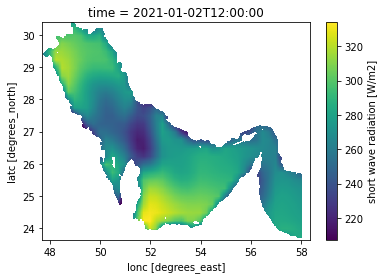

In [11]:
ds_2d_era_v8s1.swr.isel(time=12).plot()

# 2. Plot SST

## 2.1 plot SST (time series)

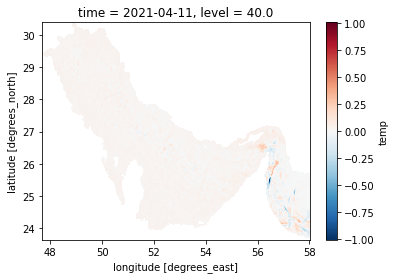

In [17]:
(ds_sur_era_v8s4.temp-ds_sur_era_v8s1.temp).isel(time=100).plot()

In [ ]:
gulf_mean_era5v8s1 = ds_sur_era_v8s1.temp.mean(dim='lonc').mean(dim='latc')
gulf_mean_era5v8s4 = ds_sur_era_v8s4.temp.mean(dim='lonc').mean(dim='latc')

<Figure size 1728x864 with 0 Axes>

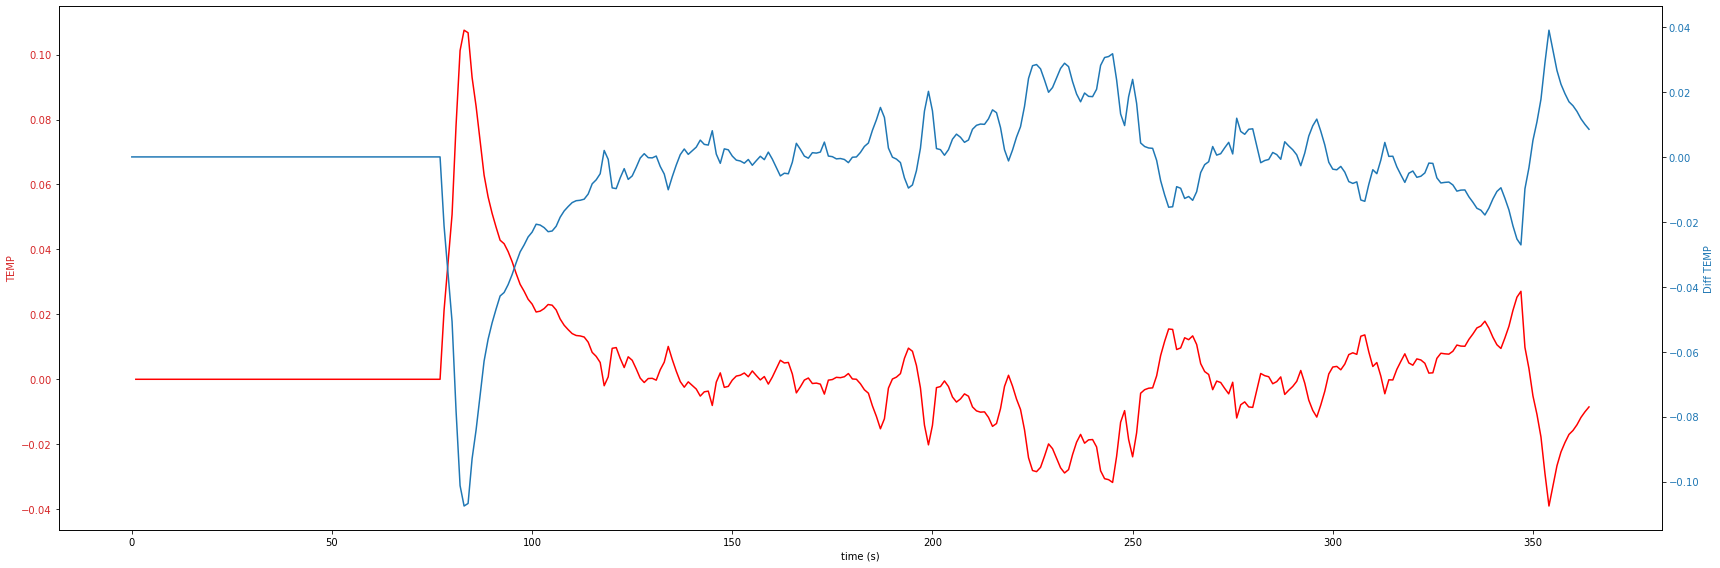

In [ ]:
# gulf_mean_era5v0 = ds_sur_era_v0.temp.mean(dim='lonc').mean(dim='latc')
# gulf_mean_era5v8s1 = ds_sur_era_v8s1.temp.mean(dim='lonc').mean(dim='latc')
plt.figure(figsize=[24,12])
# gulf_mean_era5v5.plot()
# gulf_mean_era5v6.plot()
dtemp_mean = gulf_mean_era5v8s1-gulf_mean_era5v8s4

# dtemp_mean.plot()

fig, ax1 = plt.subplots(figsize=(24,8))

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('TEMP', color=color)
ax1.plot(np.arange(1,365),gulf_mean_era5v8s1[1:], color='r')
ax1.plot(np.arange(1,365),gulf_mean_era5v8s4[1:], color='g')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Diff TEMP', color=color)  # we already handled the x-label with ax1
ax2.plot(np.arange(365),dtemp_mean, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [18]:
# gulf_mean_era5v8s1 = ds_sur_era_v8s1.temp.sel(lonc=slice(47.6,56.2)).mean(dim='lonc').mean(dim='latc')
# gulf_mean_era5v8s4 = ds_sur_era_v8s4.temp.sel(lonc=slice(47.6,56.2)).mean(dim='lonc').mean(dim='latc')

# gulf_mean_era5v0 = ds_sur_era_v0.temp.mean(dim='lonc').mean(dim='latc')

## 2.2 SWR plotting

In [26]:
swr_output_v8s1_daily = ds_2d_era_v8s1.swr.groupby('time.dayofyear').mean(dim='time')
swr_output_v8s4_daily = ds_2d_era_v8s4.swr.groupby('time.dayofyear').mean(dim='time')

In [31]:
swr_output_v8s1_daily_ra = swr_output_v8s1_daily.mean(dim='lonc').mean(dim='latc')
swr_output_v8s4_daily_ra = swr_output_v8s4_daily.mean(dim='lonc').mean(dim='latc')

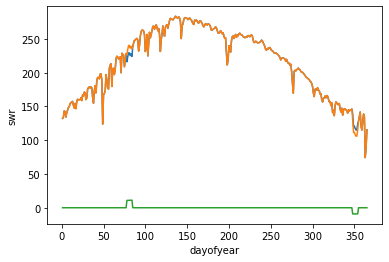

In [33]:
## data of input (meteo forcing data)
swr_output_v8s1_daily_ra.plot()
swr_output_v8s4_daily_ra.plot()
(swr_output_v8s4_daily_ra-swr_output_v8s1_daily_ra).plot()
# plt.xlim(70,90)

In [13]:
swr_mean_era5v0 = ds_2d_era_v0.swr.mean(dim='lonc').mean(dim='latc')
swr_mean_era5v8s1 = ds_2d_era_v8s1.swr.mean(dim='lonc').mean(dim='latc')
swr_mean_era5v8s4 = ds_2d_era_v8s4.swr.mean(dim='lonc').mean(dim='latc')

# shf_mean_era5v0 = ds_2d_era_v0.shf.mean(dim='lonc').mean(dim='latc')
# shf_mean_era5v8s1 = ds_2d_era_v8s1.shf.mean(dim='lonc').mean(dim='latc')

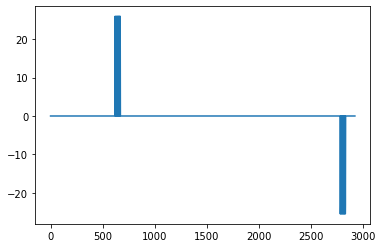

In [14]:
# swr_mean_era5v0.plot()
# swr_mean_era5v8s1.plot()
plt.plot(swr_mean_era5v8s4-swr_mean_era5v8s1)
# (shf_mean_era5v8s1-shf_mean_era5v0).plot()

(0.0, 365.0)

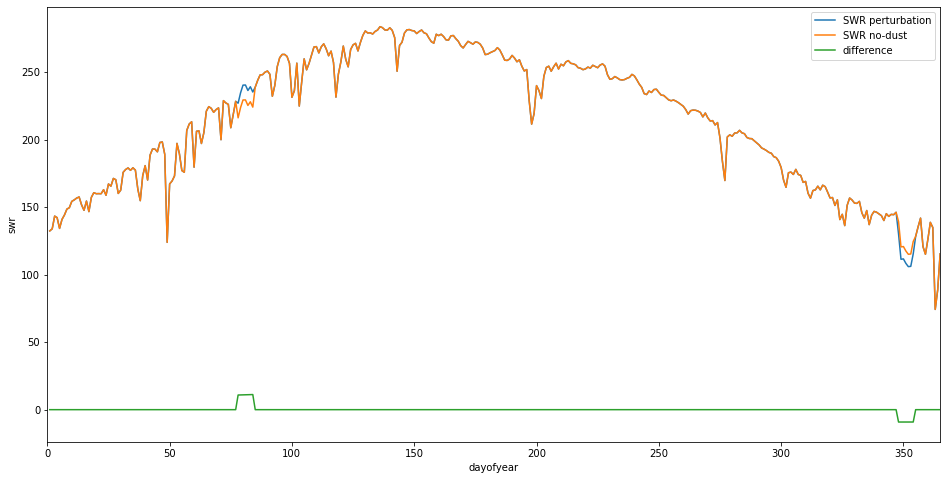

In [39]:
plt.figure(figsize=[16,8])
swr_output_v8s4_daily_ra.plot(label='SWR perturbation')
# swr_mean_era5v5_daily.plot()
swr_output_v8s1_daily_ra.plot(label='SWR no-dust')
(swr_output_v8s4_daily_ra-swr_output_v8s1_daily_ra).plot(label='difference')
# shf_mean_era5v8s1_daily.plot(label='SHF perturbation')
# # # shf_mean_era5v5_daily.plot()
# shf_mean_era5v0_daily.plot(label='SHF perturbation')

plt.legend()
plt.xlim(0,365)

(-0.125, 0.125)

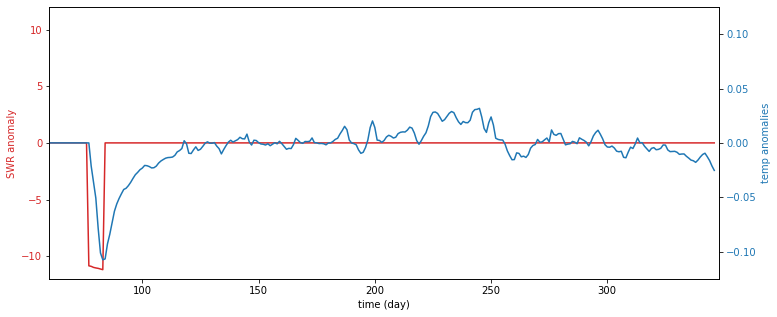

In [41]:
gulf_mean_era5v8s1 = ds_sur_era_v8s1.temp.mean(dim='lonc').mean(dim='latc')
gulf_mean_era5v8s4 = ds_sur_era_v8s4.temp.mean(dim='lonc').mean(dim='latc')

# dustplt = ds_dust_daily.dust_dens.mean(dim="lon").mean(dim="lat").data
swr_anom_daily = swr_output_v8s1_daily_ra-swr_output_v8s4_daily_ra
# swr_anom_0 = swr_mean_era5v6s-swr_mean_era5v0
dtemp_mean = gulf_mean_era5v8s1-gulf_mean_era5v8s4
dtempplt = dtemp_mean.data

# ds_sur_era_v5.mean(dim=lonc).mean(dim=latc)

# dswr = swr_mean_era5v6_daily-swr_mean_era5v5_daily
# dtempplt = dtemp_sur.isel(level=0).sel(lonc=52,latc=27).data

fig, ax1 = plt.subplots(figsize=(12,5))

color = 'tab:red'
ax1.set_xlabel('time (day)')
ax1.set_ylabel('SWR anomaly', color=color)
ax1.plot(np.arange(347),swr_anom_daily[0:347], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-12,12)
ax1.set_xlim(60,348)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('temp anomalies', color=color)  # we already handled the x-label with ax1
ax2.plot(np.arange(347),dtempplt[0:347], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-0.125,0.125)

# ax1.set_xlim(80,95)


In [53]:
dtemp = gulf_mean_era5v8s1-gulf_mean_era5v8s4

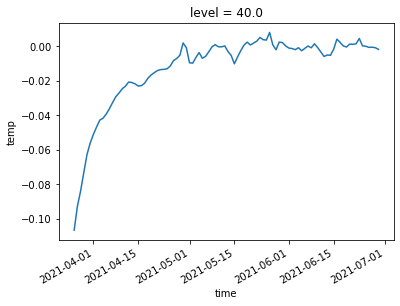

In [62]:
dtemp[84:180].plot()
# dtemp[84:180]

In [42]:
gulf_mean_era5v8s1_r1 = ds_sur_era_v8s1.temp.sel(lonc=slice(47.6,50.4)).mean(dim='lonc').mean(dim='latc')
gulf_mean_era5v8s4_r1 = ds_sur_era_v8s4.temp.sel(lonc=slice(47.6,50.4)).mean(dim='lonc').mean(dim='latc')

gulf_mean_era5v8s1_r2 = ds_sur_era_v8s1.temp.sel(lonc=slice(50.4,53.2)).mean(dim='lonc').mean(dim='latc')
gulf_mean_era5v8s4_r2 = ds_sur_era_v8s4.temp.sel(lonc=slice(50.4,53.2)).mean(dim='lonc').mean(dim='latc')

gulf_mean_era5v8s1_r3 = ds_sur_era_v8s1.temp.sel(lonc=slice(53.2,56.2)).mean(dim='lonc').mean(dim='latc')
gulf_mean_era5v8s4_r3 = ds_sur_era_v8s4.temp.sel(lonc=slice(53.2,56.2)).mean(dim='lonc').mean(dim='latc')

In [43]:
dtemp_mean_r1 = gulf_mean_era5v8s1_r1-gulf_mean_era5v8s4_r1
dtemp_mean_r2 = gulf_mean_era5v8s1_r2-gulf_mean_era5v8s4_r2
dtemp_mean_r3 = gulf_mean_era5v8s1_r3-gulf_mean_era5v8s4_r3

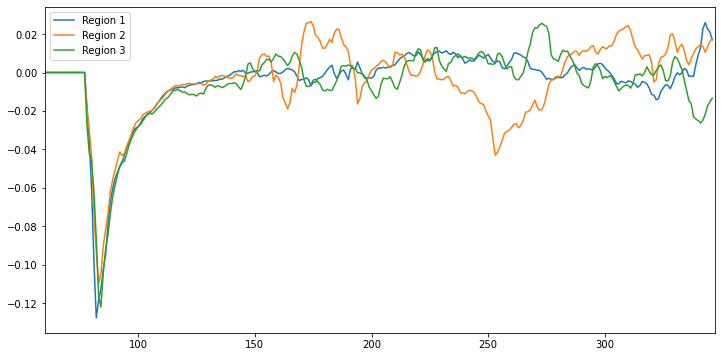

In [44]:
fig = plt.figure(figsize=(12,6))
plt.plot(dtemp_mean_r1[0:347],label='Region 1')
plt.plot(dtemp_mean_r2[0:347],label='Region 2')
plt.plot(dtemp_mean_r3[0:347],label='Region 3')
plt.xlim(60,347)
plt.legend()

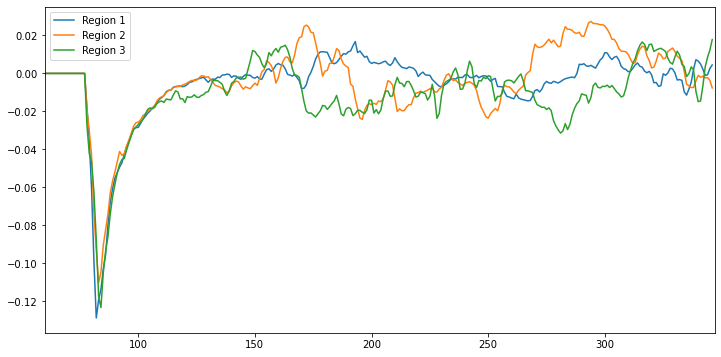

In [99]:
fig = plt.figure(figsize=(12,6))
plt.plot(dtemp_mean_r1[0:347],label='Region 1')
plt.plot(dtemp_mean_r2[0:347],label='Region 2')
plt.plot(dtemp_mean_r3[0:347],label='Region 3')
plt.xlim(60,347)
plt.legend()

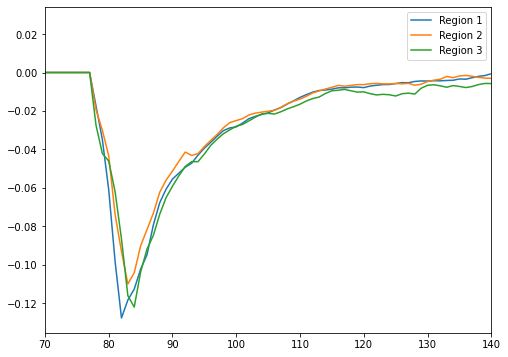

In [48]:
fig = plt.figure(figsize=(8,6))
plt.plot(dtemp_mean_r1[0:347],label='Region 1')
plt.plot(dtemp_mean_r2[0:347],label='Region 2')
plt.plot(dtemp_mean_r3[0:347],label='Region 3')
plt.xlim(70,140)
plt.legend()

/fs1/home/ceoas/liux8/GETM_shrad/getm/setups/cross_spectral.py:240: RuntimeWarning: invalid value encountered in arcsin
  del_phi = np.arcsin(np.sqrt((2 / (dof - 2)) * ((1 - gsq) / gsq) * stats.f.ppf(alpha, 2, dof-2)))


Text(0.5, 1.0, 'Phase')

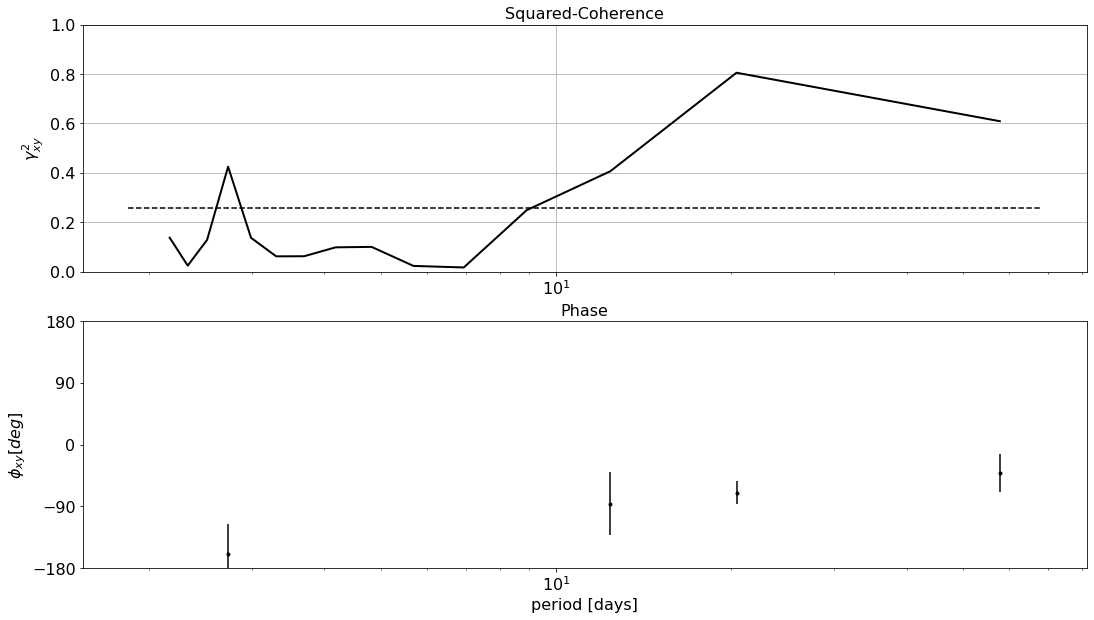

In [47]:
fontz=16
# fint = [20,500]

[f,gsq,phi,gsq_crit,del_phi]=cross_spectral.crossSpec(swr_anom_daily[0:347],dtempplt[0:347,0],86400,22,1)

### do plot
# crossSpecPlot(f, gsq, phi, gsq_crit, del_phi,[2, 400])
fig, ax1 = plt.subplots(figsize=(18,10))

plt.subplot(2, 1, 1)
plt.plot(1/f/86400 , gsq, 'k',linewidth=2)
# if fint is not None:
#     plt.xlim(fint)
plt.xscale('log')
# plt.xlabel('f [cycles per unit time]')
plt.ylabel(r'$\gamma_{xy}^2$', fontsize=fontz)
plt.title('Squared-Coherence', fontsize=fontz)
plt.xticks(fontsize=fontz)
plt.yticks(fontsize=fontz)
    
# Add coherence significance level
a = plt.axis()
plt.plot([a[0], a[1]], [gsq_crit, gsq_crit], 'k--')
plt.ylim([0, 1])
plt.grid(True)
a = plt.axis()

# Plot phase
plt.subplot(2, 1, 2)
ind = np.where(gsq >= gsq_crit)[0]
plt.errorbar(1/f[ind]/86400, np.degrees(phi[ind]), np.degrees(del_phi[ind]), fmt='k.')
# if fint is not None:
#     plt.xlim(fint)
plt.ylim([-180, 180])
plt.xlim(a[0:2]) ## aling xlim with subplot(211)
plt.yticks([-180, -90, 0, 90, 180], fontsize=fontz)
plt.xticks(fontsize=fontz)
plt.xscale('log')
# plt.xlabel('f [cycles per unit time]', fontsize=fontz)
plt.xlabel('period [days]', fontsize=fontz)
plt.ylabel(r'$\phi_{xy} [deg]$', fontsize=fontz)
plt.title('Phase', fontsize=fontz)

/fs1/home/ceoas/liux8/GETM_shrad/getm/setups/cross_spectral.py:244: RuntimeWarning: invalid value encountered in arcsin
  del_phi = np.arcsin(np.sqrt((2 / (dof - 2)) * ((1 - gsq) / gsq) * stats.f.ppf(alpha, 2, dof-2)))


Text(0.5, 1.0, 'Phase')

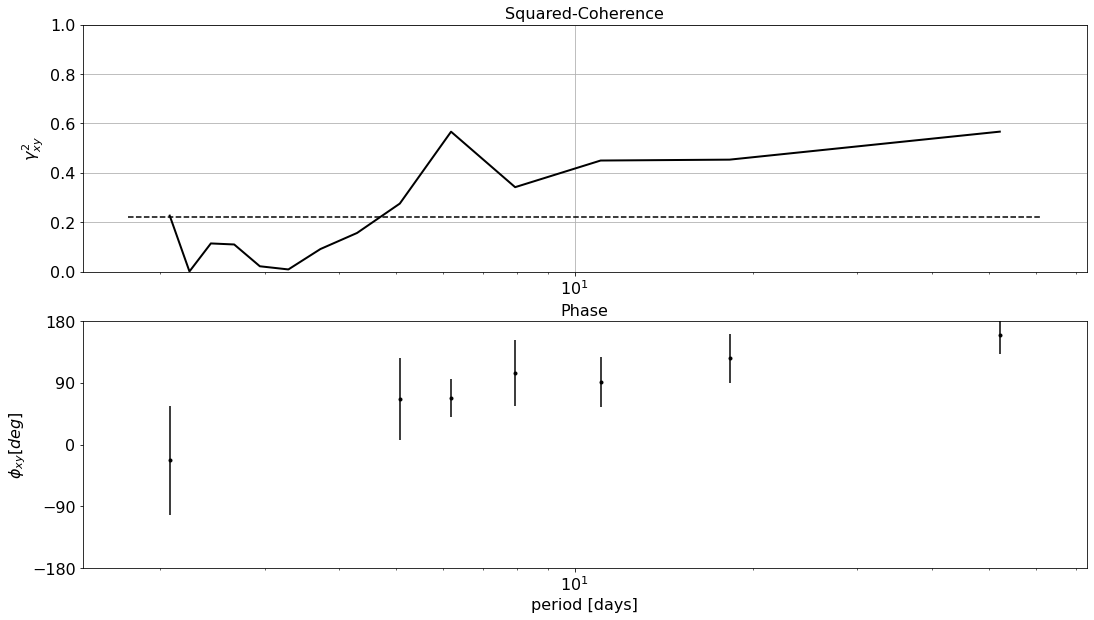

In [98]:
fontz=16
# fint = [20,500]

[f,gsq,phi,gsq_crit,del_phi]=cross_spectral.crossSpec(dustplt,dtempplt[:,0],86400,26,1)

### do plot
# crossSpecPlot(f, gsq, phi, gsq_crit, del_phi,[2, 400])
fig, ax1 = plt.subplots(figsize=(18,10))

plt.subplot(2, 1, 1)
plt.plot(1/f/86400 , gsq, 'k',linewidth=2)
# if fint is not None:
#     plt.xlim(fint)
plt.xscale('log')
# plt.xlabel('f [cycles per unit time]')
plt.ylabel(r'$\gamma_{xy}^2$', fontsize=fontz)
plt.title('Squared-Coherence', fontsize=fontz)
plt.xticks(fontsize=fontz)
plt.yticks(fontsize=fontz)
    
# Add coherence significance level
a = plt.axis()
plt.plot([a[0], a[1]], [gsq_crit, gsq_crit], 'k--')
plt.ylim([0, 1])
plt.grid(True)
a = plt.axis()

# Plot phase
plt.subplot(2, 1, 2)
ind = np.where(gsq >= gsq_crit)[0]
plt.errorbar(1/f[ind]/86400, np.degrees(phi[ind]), np.degrees(del_phi[ind]), fmt='k.')
# if fint is not None:
#     plt.xlim(fint)
plt.ylim([-180, 180])
plt.xlim(a[0:2]) ## aling xlim with subplot(211)
plt.yticks([-180, -90, 0, 90, 180], fontsize=fontz)
plt.xticks(fontsize=fontz)
plt.xscale('log')
# plt.xlabel('f [cycles per unit time]', fontsize=fontz)
plt.xlabel('period [days]', fontsize=fontz)
plt.ylabel(r'$\phi_{xy} [deg]$', fontsize=fontz)
plt.title('Phase', fontsize=fontz)

## 2.2 plot dust cases 

In [41]:
swr_era5v8s1_daily = ds_2d_era_v8s1.swr.groupby("time.dayofyear").mean(dim="time")
swr_era5v8s4_daily = ds_2d_era_v8s4.swr.groupby("time.dayofyear").mean(dim="time")


### 1. CASE 1 (day 78)

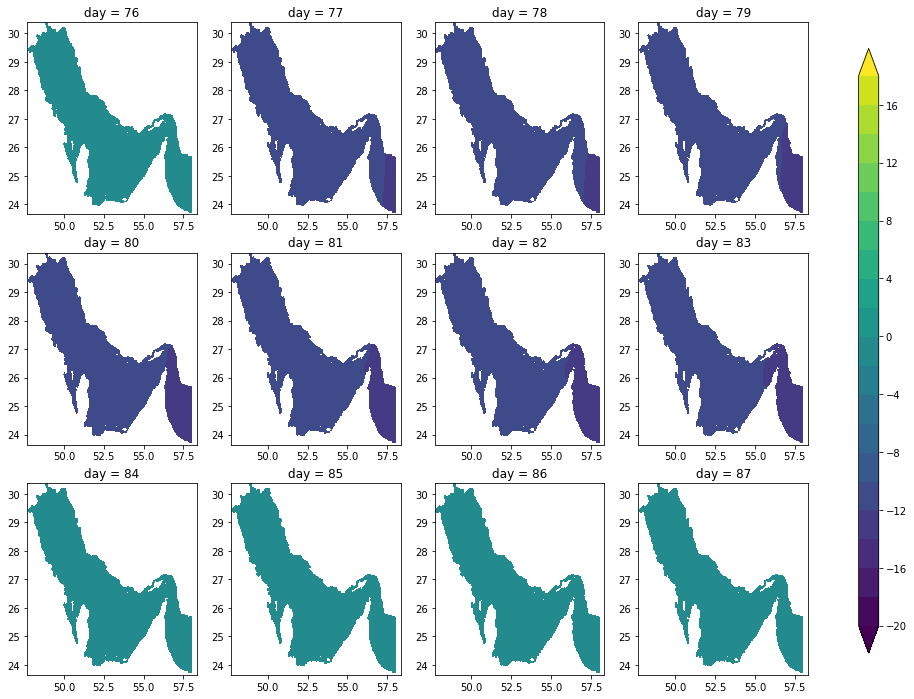

In [74]:
fig, axs = plt.subplots(3,4,figsize=[14,12])
day_of_year=76
year = 2021

for i in range(3):
    for j in range(4):
        ik = i*4+j
#     axs[j,i]
        im=axs[i,j].contourf(swr_era5v8s1_daily.lonc, \
                      swr_era5v8s1_daily.latc, \
                      (swr_era5v8s1_daily-swr_era5v8s4_daily).isel(dayofyear=day_of_year+ik),
                    levels=np.arange(-20,20,2),vmin=-20,vmax=20,extend='both')
        axs[i,j].set_title(f'day = {day_of_year+ik}')
        
#         date_0 = pd.to_datetime(f"{year}-{day_of_year+ik}", format="%Y-%j")
#         date_1 = pd.to_datetime(f"{year}-{day_of_year+ik+1}", format="%Y-%j")

#         xpl = ds_obs.x.where(ds_obs['id']==idplt,drop=True).sel(t=slice(date_0,date_1))
#         ypl = ds_obs.y.where(ds_obs['id']==idplt,drop=True).sel(t=slice(date_0,date_1))
#         axs[i,j].scatter(xpl,ypl,s=20,color='red')
    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)


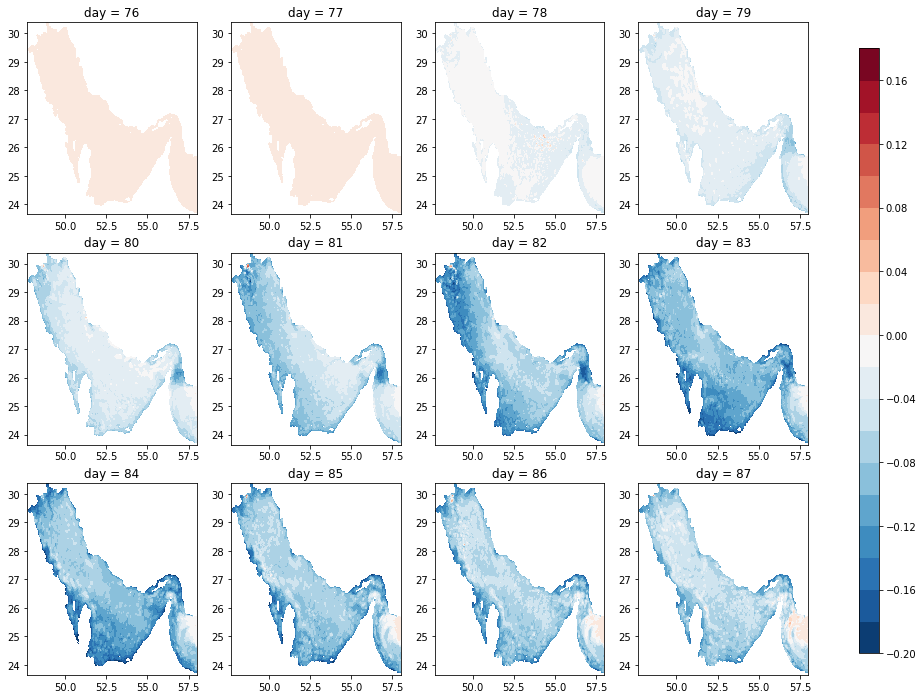

In [5]:
fig, axs = plt.subplots(3,4,figsize=[14,12])
day_of_year=76
year = 2021

for i in range(3):
    for j in range(4):
        ik = i*4+j
#     axs[j,i]
        im=axs[i,j].contourf(ds_sur_era_v8s1_daily.lonc, \
                      ds_sur_era_v8s1_daily.latc, \
                      (ds_sur_era_v8s1_daily-ds_sur_era_v8s4_daily).temp.isel(level=0,dayofyear=day_of_year+ik),levels=np.arange(-0.2,0.2,0.02),cmap='RdBu_r')
                    # levels=np.arange(0,1.1e-3,1e-4),vmin=0,vmax=1.e-3,extend='max')
        axs[i,j].set_title(f'day = {day_of_year+ik}')
        
#         date_0 = pd.to_datetime(f"{year}-{day_of_year+ik}", format="%Y-%j")
#         date_1 = pd.to_datetime(f"{year}-{day_of_year+ik+1}", format="%Y-%j")

#         xpl = ds_obs.x.where(ds_obs['id']==idplt,drop=True).sel(t=slice(date_0,date_1))
#         ypl = ds_obs.y.where(ds_obs['id']==idplt,drop=True).sel(t=slice(date_0,date_1))
#         axs[i,j].scatter(xpl,ypl,s=20,color='red')
    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)


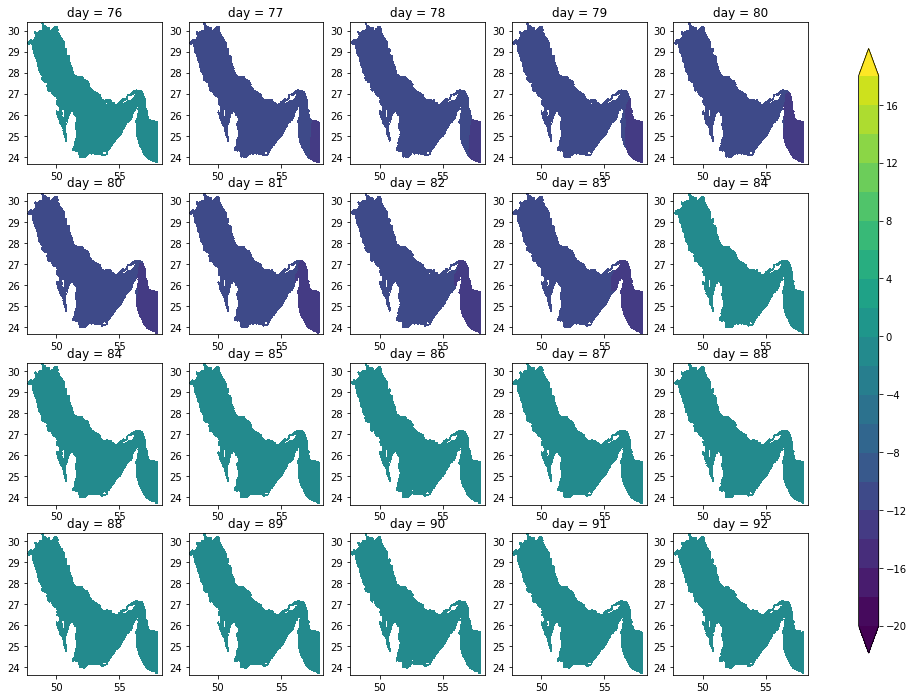

In [55]:
day_of_year=76
year = 2021

fig, axs = plt.subplots(4,5,figsize=[14,12])
for i in range(4):
    for j in range(5):
        ik = i*4+j
#     axs[j,i]
        im=axs[i,j].contourf(swr_era5v8s1_daily.lonc, \
                      swr_era5v8s1_daily.latc, \
                      (swr_era5v8s1_daily-swr_era5v8s4_daily).isel(dayofyear=day_of_year+ik),
                    levels=np.arange(-20,20,2),vmin=-20,vmax=20,extend='both')
        axs[i,j].set_title(f'day = {day_of_year+ik}')
    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)

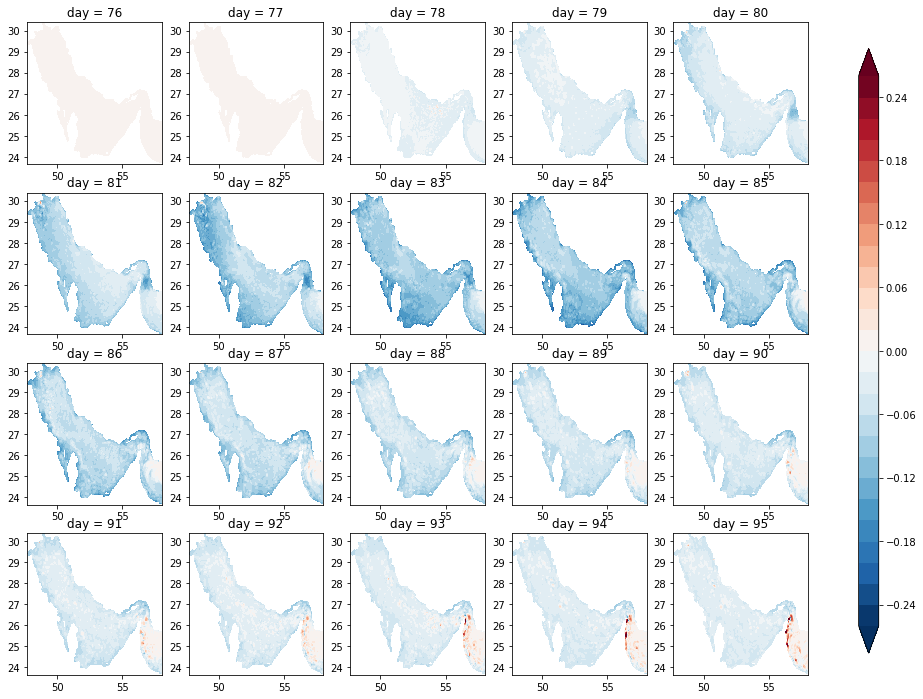

In [6]:
day_of_year=76
year = 2021

fig, axs = plt.subplots(4,5,figsize=[14,12])
for i in range(4):
    for j in range(5):
        ik = i*5+j
#     axs[j,i]
        im=axs[i,j].contourf(ds_sur_era_v8s1_daily.lonc, \
                      ds_sur_era_v8s1_daily.latc, \
                      (ds_sur_era_v8s1_daily-ds_sur_era_v8s4_daily).temp.isel(level=0,dayofyear=day_of_year+ik),
                             levels=np.arange(-0.26,0.28,0.02),cmap='RdBu_r',extend='both')
                    # levels=np.arange(0,1.1e-3,1e-4),vmin=0,vmax=1.e-3,extend='max')
        axs[i,j].set_title(f'day = {day_of_year+ik}')
    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)

(23.5, 30.5)

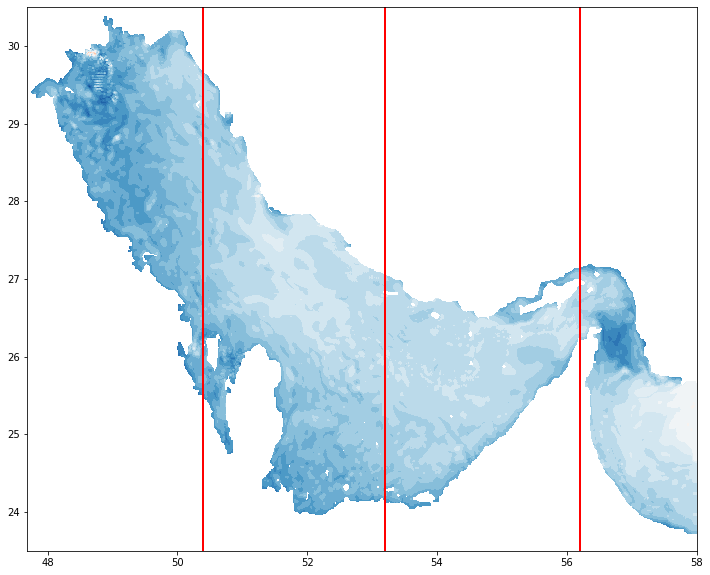

In [7]:
fig = plt.figure(figsize=(12,10))
plt.contourf(ds_sur_era_v8s1_daily.lonc, 
                      ds_sur_era_v8s1_daily.latc, 
                     (ds_sur_era_v8s1_daily-ds_sur_era_v8s4_daily).temp.isel(level=0,dayofyear=82),
                       levels=np.arange(-0.26,0.28,0.02),
                        cmap='RdBu_r',extend='both')
plt.plot([50.4,50.4],[23.5, 30.5],color='r',linewidth=2)
plt.plot([53.2,53.2],[23.5, 30.5],color='r',linewidth=2)
plt.plot([56.2,56.2],[23.5, 30.5],color='r',linewidth=2)
plt.ylim(23.5,30.5)

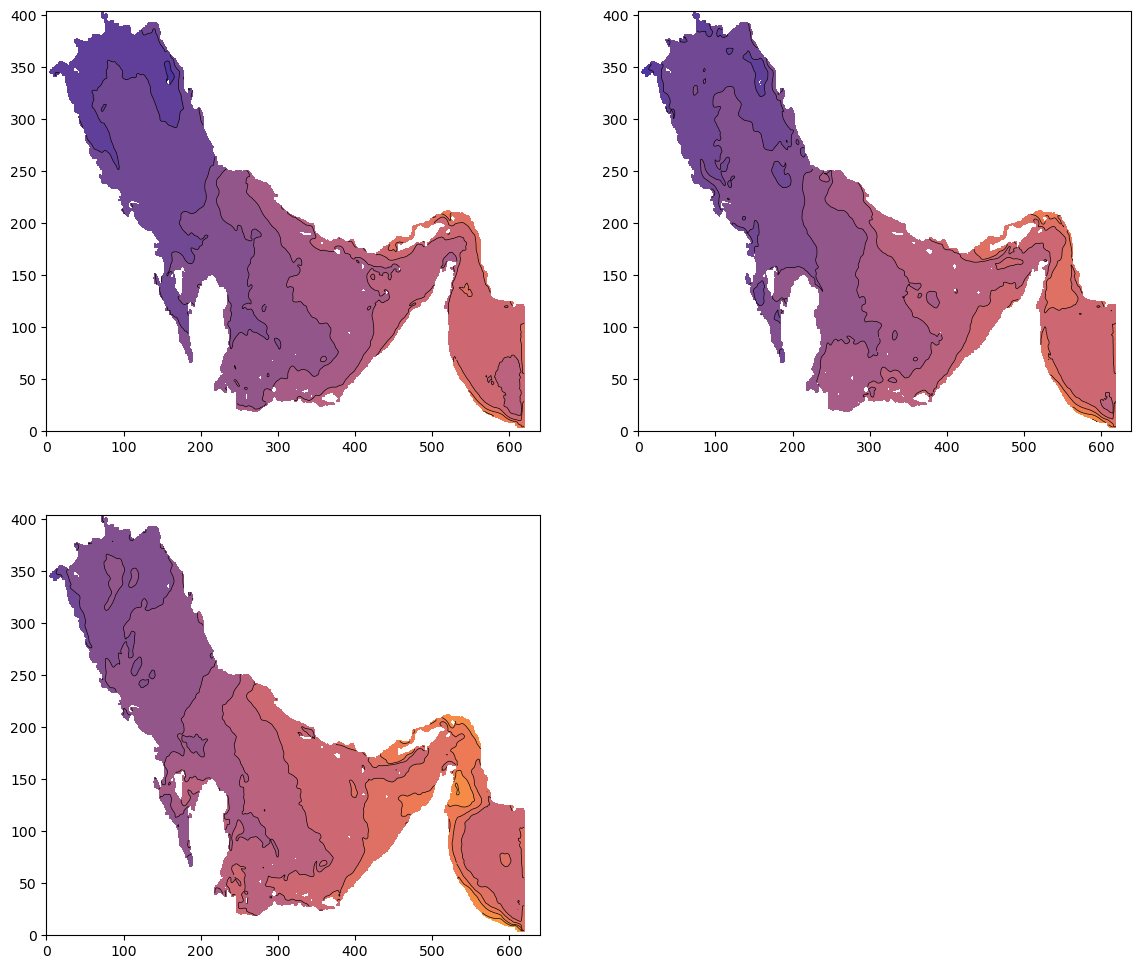

In [9]:
fig = plt.figure(figsize=[14,12])
# fig,axes = plt.subplots(nrows=1, ncols=2)

imon=3

ax = fig.add_subplot(2, 2, 1)
cmp.plt.contourf(temp_mean_ctl.isel(time=imon,level=40),cmap=cmo.thermal,\
                 levels=np.linspace(15,35,21))
# plt.colorbar()
cmp.plt.contour(temp_mean_ctl.isel(time=imon,level=40),\
                 levels=np.linspace(15,35,21),colors='black',linewidths=0.5)
ax = fig.add_subplot(2, 2, 2)
im = cmp.plt.contourf(temp_mean_rad.isel(time=imon,level=40),cmap=cmo.thermal,\
                 levels=np.linspace(15,35,21))
cmp.plt.contour(temp_mean_rad.isel(time=imon,level=40),\
                 levels=np.linspace(15,35,21),colors='black',linewidths=0.5)
ax = fig.add_subplot(2, 2, 3)
im = cmp.plt.contourf(temp_mean_era.isel(time=imon,level=40),cmap=cmo.thermal,\
                 levels=np.linspace(15,35,21))
cmp.plt.contour(temp_mean_era.isel(time=imon,level=40),\
                 levels=np.linspace(15,35,21),colors='black',linewidths=0.5)
# fig.colorbar(im, ax=axes.ravel().tolist())


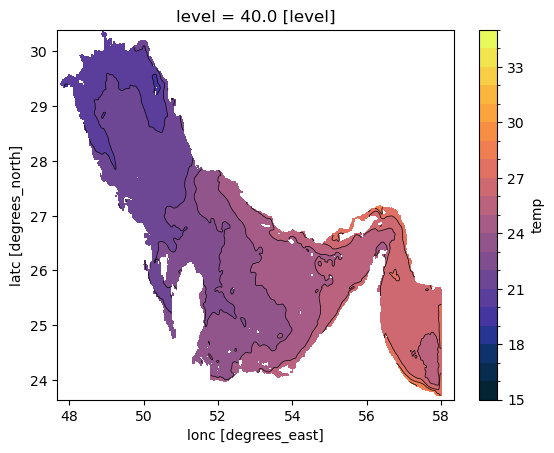

In [74]:
temp_mean_ctl.isel(time=imon,level=40).plot(cmap=cmo.thermal,levels=np.linspace(15,35,21))

temp_mean_ctl.isel(time=imon,level=40).plot.contour(levels=np.linspace(15,35,21),colors='black',linewidths=0.5)


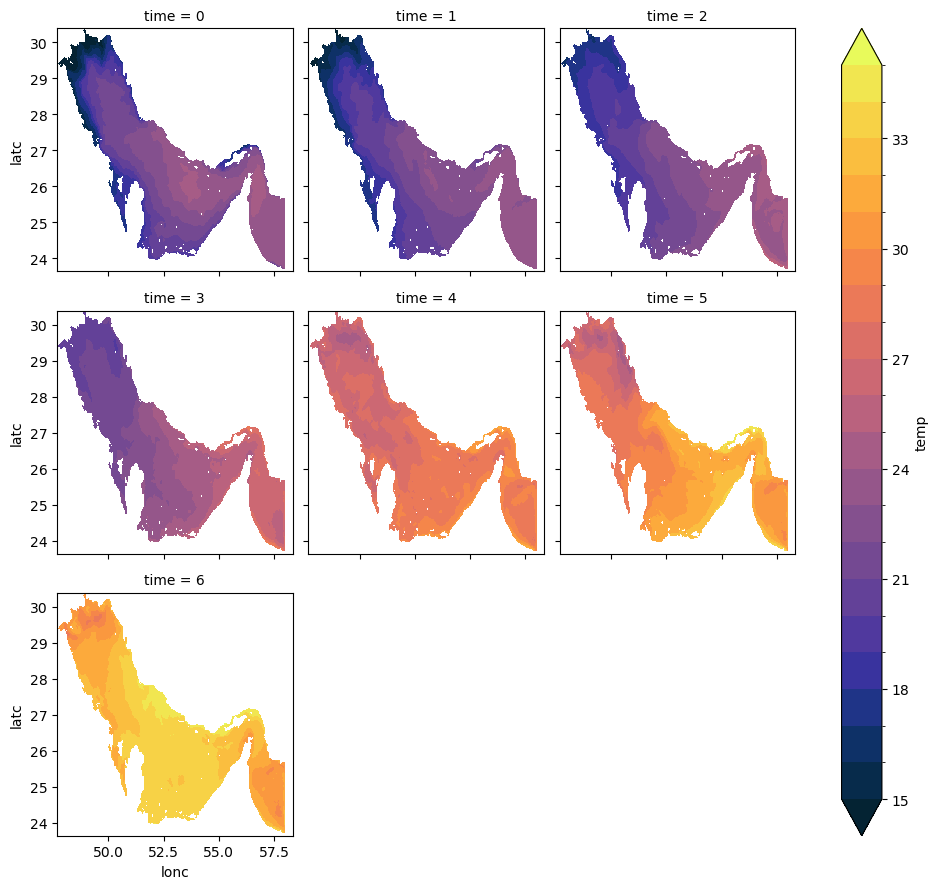

In [81]:
g_simple = temp_mean_ctl.isel(time=slice(0,7),level=40).plot(x="lonc", y="latc", col="time", col_wrap=3,\
                                                            cmap=cmo.thermal,levels=np.linspace(15,35,21))


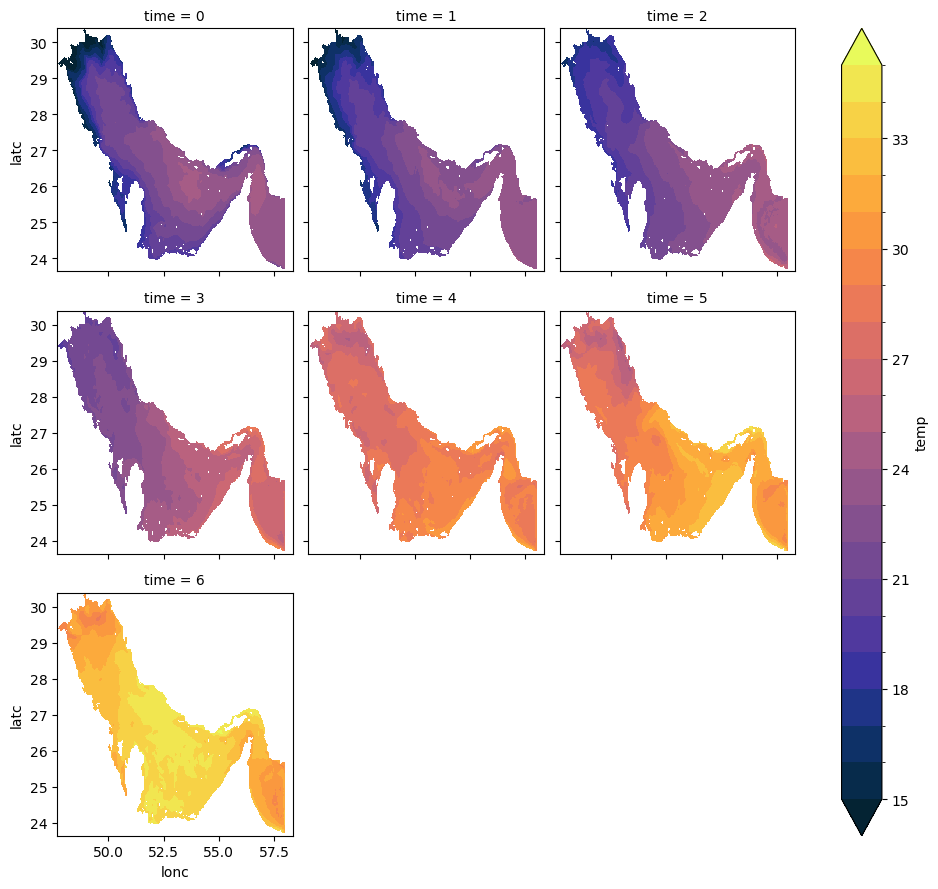

In [82]:
g_simple = temp_mean_rad.isel(time=slice(0,7),level=40).plot(x="lonc", y="latc", col="time", col_wrap=3,\
                                                            cmap=cmo.thermal,levels=np.linspace(15,35,21))

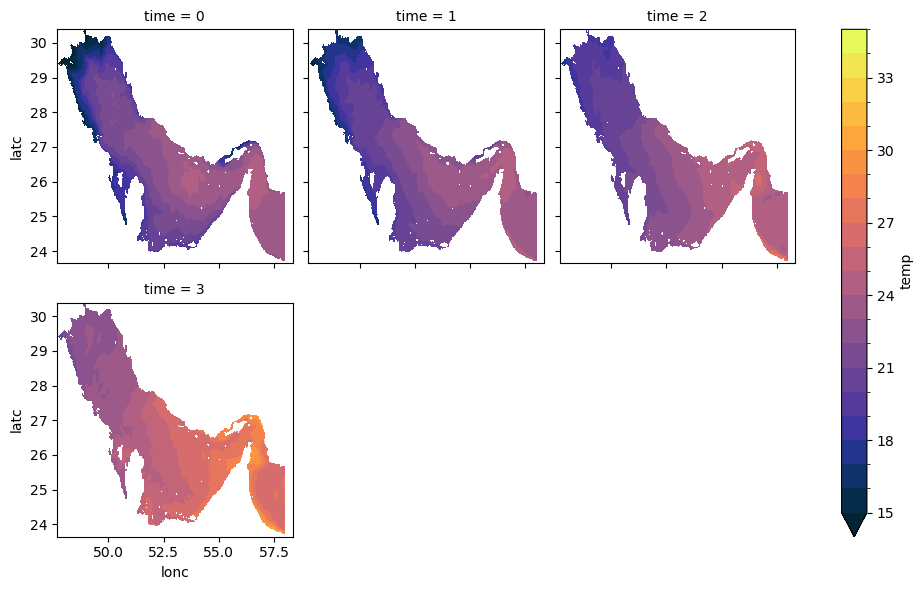

In [12]:
g_simple = temp_mean_era.isel(time=slice(0,4),level=40).plot(x="lonc", y="latc", col="time", col_wrap=3,\
                                                            cmap=cmo.thermal,levels=np.linspace(15,35,21))

In [65]:
ds_2d = xr.open_dataset('data_ini_01012021/2d/PersianGulf.2d.nc')
ds_2d

<xarray.Dataset>
Dimensions:     (lonc: 640, latc: 405, time: 730)
Coordinates:
  * lonc        (lonc) float64 47.68 47.7 47.72 47.73 ... 58.28 58.3 58.32 58.33
  * latc        (latc) float64 23.65 23.67 23.68 23.7 ... 30.35 30.37 30.38
  * time        (time) datetime64[ns] 2021-01-01 ... 2021-12-31T12:00:00
Data variables: (12/19)
    grid_type   int32 ...
    ioff        int32 ...
    joff        int32 ...
    dlon        float64 ...
    dlat        float64 ...
    latu        (latc, lonc) float64 ...
    ...          ...
    dxx         (latc, lonc) float64 ...
    dyx         (latc, lonc) float64 ...
    bathymetry  (latc, lonc) float64 ...
    elev        (time, latc, lonc) float32 ...
    u           (time, latc, lonc) float32 ...
    v           (time, latc, lonc) float32 ...
Attributes:
    title:    Hot Persian Gulf
    model:    GETM - www.getm.eu
    history:  Thu Nov 16 13:59:31 2023 : ncmerge PersianGulf.2d.0000.nc Persi...

In [67]:
ds_2d_mean = ds_2d.mean(dim='time')
ds_2d_mean

<xarray.Dataset>
Dimensions:     (lonc: 640, latc: 405)
Coordinates:
  * lonc        (lonc) float64 47.68 47.7 47.72 47.73 ... 58.28 58.3 58.32 58.33
  * latc        (latc) float64 23.65 23.67 23.68 23.7 ... 30.35 30.37 30.38
Data variables: (12/19)
    grid_type   float64 2.0
    ioff        float64 169.0
    joff        float64 417.0
    dlon        float64 0.01667
    dlat        float64 0.01667
    latu        (latc, lonc) float64 nan nan nan nan nan ... nan nan nan nan nan
    ...          ...
    dxx         (latc, lonc) float64 nan nan nan nan nan ... nan nan nan nan nan
    dyx         (latc, lonc) float64 nan nan nan nan nan ... nan nan nan nan nan
    bathymetry  (latc, lonc) float64 nan nan nan nan nan ... nan nan nan nan nan
    elev        (latc, lonc) float32 nan nan nan nan nan ... nan nan nan nan nan
    u           (latc, lonc) float32 nan nan nan nan nan ... nan nan nan nan nan
    v           (latc, lonc) float32 nan nan nan nan nan ... nan nan nan nan nan

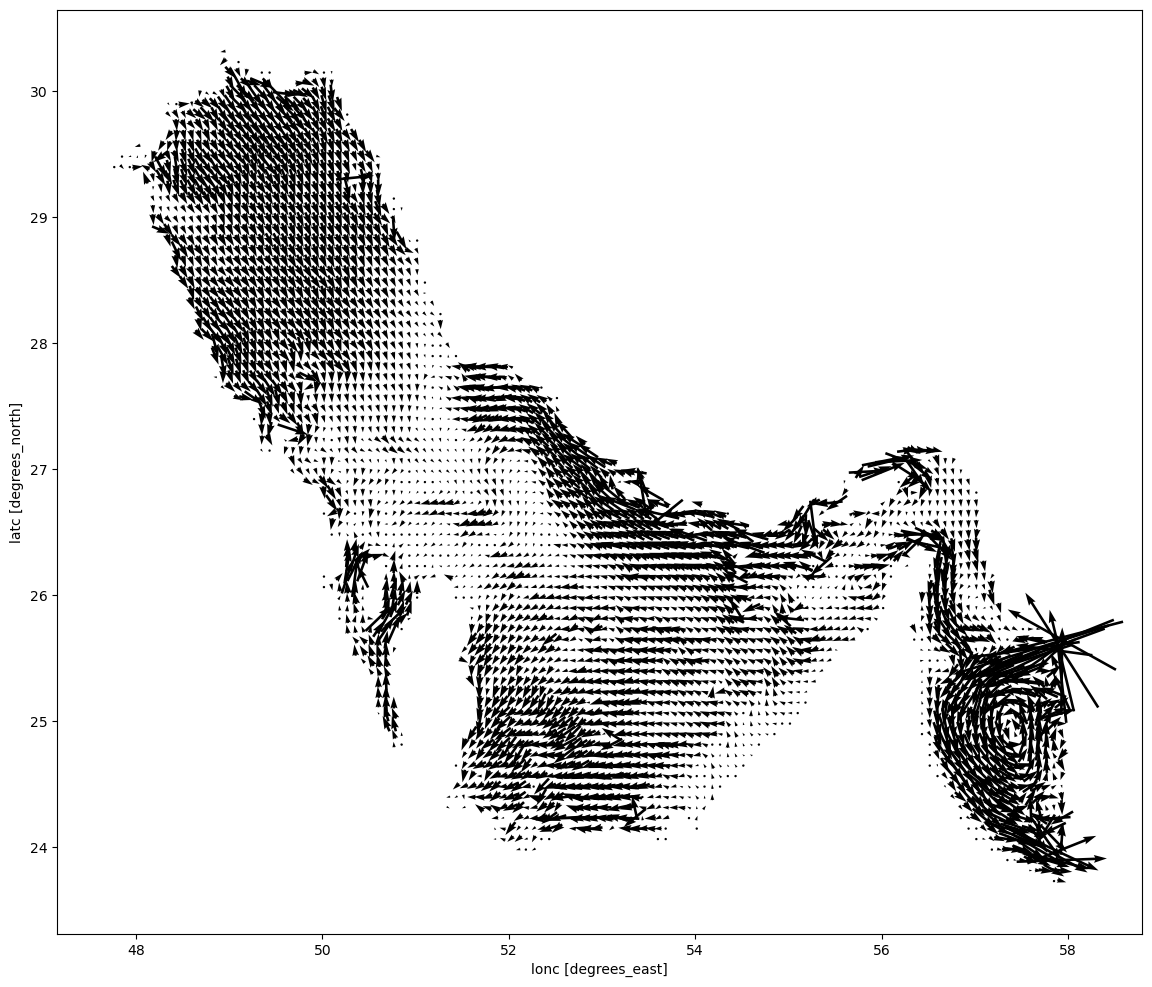

In [74]:
fig = plt.figure(figsize=[14,12])
ds_2d_mean.isel(latc=range(0,405,5), \
                     lonc=range(0,640,5)).plot.quiver(x='lonc',y='latc',u='u',v='v',scale=5)

In [89]:
month_length = ds_2d.time.dt.days_in_month
weights = (
    month_length.groupby("time.month") / month_length.groupby("time.month").sum()
)
# month_length.groupby("time.month")
weights

/home/server/pi/homes/liux8/.conda/envs/dev_scipy/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


<xarray.DataArray 'days_in_month' (time: 730)>
array([0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01785714, 0.01785714, 0.01785714,
       0.01785714, 0.01785714, 0.01785714, 0.01785714, 0.01785714,
       0.01785714, 0.01785714, 0.01785714, 0.01785714, 0.01785714,
       0.01785714, 0.01785714, 0.01785714, 0.01785714, 0.01785714,
       0.01785714, 0.01785714, 0.01785714, 0.01785714, 0.01785714,
       0.01785714, 0.01785714, 0.01785714, 0.01785714, 0.01785714,
       0.01785714, 0.01785714, 0.01785714, 0.01785714, 0.01785714,
       0.01785714, 0.01785714, 0.01785714, 0.01785714, 0.01785714,
...
       0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667,
       0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667,
       0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667,
       0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667,
       0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667,
       0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667,
       0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667,
       0.01666667, 0.01666667, 0.01666667, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903,
       0.01612903, 0.01612903, 0.01612903, 0.01612903, 0.01612903])
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 ... 2021-12-31T12:00:00
    month    (time) int64 1 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12 12

In [15]:
# read SST data from matlab mat files
fdata = h5py.File('/home/server/pi/homes/liux8/work/OBS/sst_satellite/sst_2021_MUR.mat','r')
fcoor = loadmat('/home/server/pi/homes/liux8/work/OBS/sst_satellite/sst_lonlat_MUR.mat')

sst_obs = fdata['sst'][:]
ilon1 = fdata['ilon1'][:]
jlat1 = fdata['jlat1'][:]
# lon_obs = np.transpose(fcoor['lon'])
# lat_obs = np.transpose(fcoor['lat'])
tim_obs = np.arange('2021-01','2022-01',dtype='datetime64[D]')
lon_obs = fcoor['lon'][int(ilon1[0,0])-1:int(ilon1[0,-1]),0]
lat_obs = fcoor['lat'][int(jlat1[0,0])-1:int(jlat1[0,-1]),0]

# create a dataset for observed SST (MUR)
ds_obs = xr.Dataset(
    data_vars=dict(
        sst=(["time", "lat", "lon"], sst_obs-273.15)
    ),
    coords=dict(
        lon=(["lon"], lon_obs),
        lat=(["lat"], lat_obs),
        time=tim_obs,
    ),
    attrs=dict(description="MUR SST."),
)

In [16]:
# do monthly average for observed sst
td = ds_obs.time.dt.month

weights = (
    td.groupby("time.month") / td.groupby("time.month").sum()
)

ds_weighted = (ds_obs * weights).groupby("time.month").sum(dim="time")
ds_weighted = ds_weighted.where(ds_weighted)

/home/server/pi/homes/liux8/.conda/envs/dev_scipy/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


In [17]:
# do interpolation
lonc = temp_ctl.lonc.data
latc = temp_ctl.latc.data

ds_weighted_interp = ds_weighted.interp(lon=lonc,lat=latc)

In [224]:
ds_weighted_interp

<xarray.Dataset>
Dimensions:  (month: 12, lat: 405, lon: 640)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lon      (lon) float64 47.68 47.7 47.72 47.73 ... 58.28 58.3 58.32 58.33
  * lat      (lat) float64 23.65 23.67 23.68 23.7 ... 30.33 30.35 30.37 30.38
Data variables:
    sst      (month, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

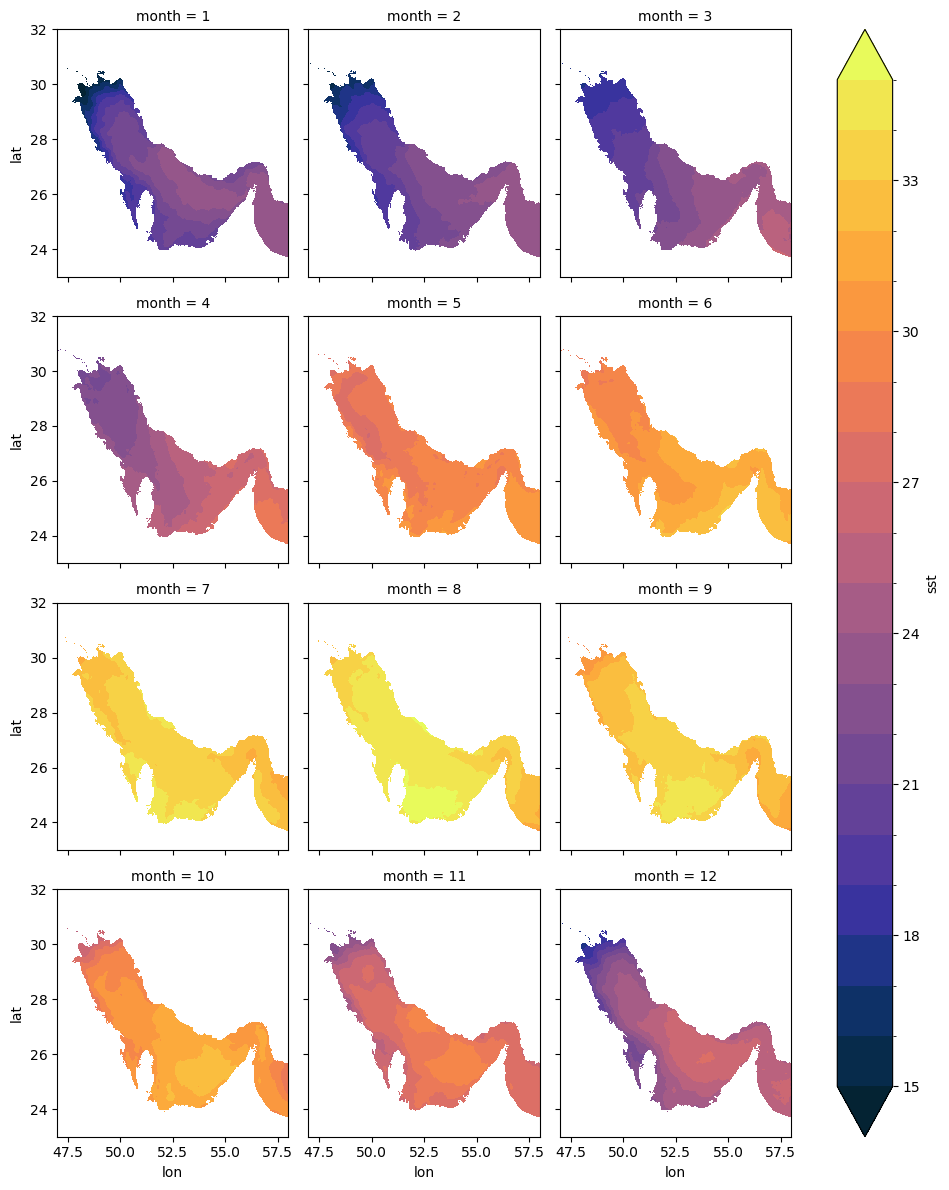

In [203]:
g_simple = ds_weighted.sst.isel(month=slice(0,12)).plot(x="lon", y="lat", col="month", col_wrap=3,\
                                                            cmap=cmo.thermal,levels=np.linspace(15,35,21))

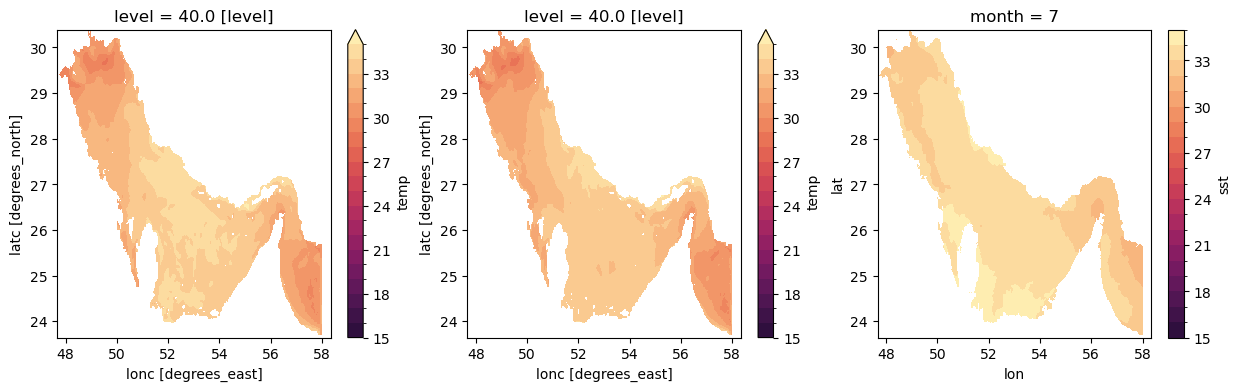

In [228]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 3, 1)
temp_mean_rad.isel(time=6,level=40).plot.pcolormesh(cmap=cmo.matter_r,levels=np.linspace(15,35,21))
# ax.pcolormesh(Z, cmap=cmo.matter)

ax = fig.add_subplot(1, 3, 3)
ds_weighted_interp.sst.isel(month=6).plot.pcolormesh(cmap=cmo.matter_r,levels=np.linspace(15,35,21))
# lightcmap = cmocean.tools.lighten(cmo.matter, 0.5)
# ax.pcolormesh(Z, cmap=lightcmap)
# fig.tight_layout()
ax = fig.add_subplot(1, 3, 2)
temp_mean_ctl.isel(time=6,level=40).plot.pcolormesh(cmap=cmo.matter_r,levels=np.linspace(15,35,21))

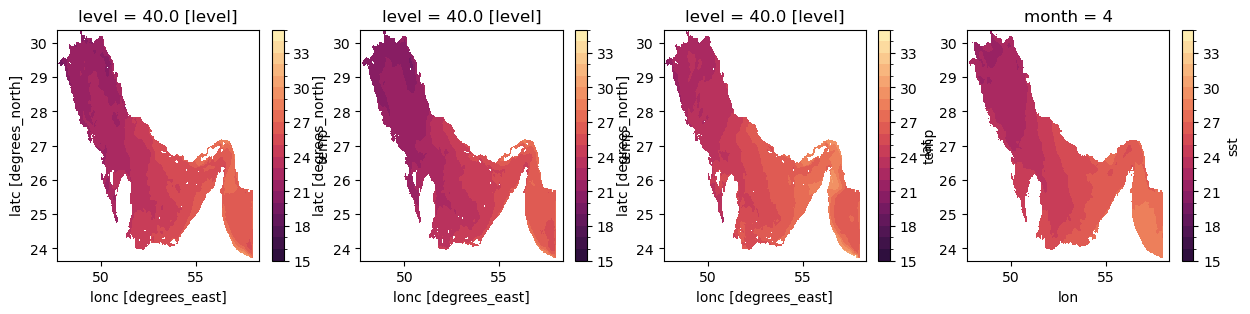

In [19]:
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(1, 4, 1)
temp_mean_rad.isel(time=3,level=40).plot.pcolormesh(cmap=cmo.matter_r,levels=np.linspace(15,35,21))
# ax.pcolormesh(Z, cmap=cmo.matter)

ax = fig.add_subplot(1, 4, 4)
ds_weighted_interp.sst.isel(month=3).plot.pcolormesh(cmap=cmo.matter_r,levels=np.linspace(15,35,21))
# lightcmap = cmocean.tools.lighten(cmo.matter, 0.5)
# ax.pcolormesh(Z, cmap=lightcmap)
# fig.tight_layout()
ax = fig.add_subplot(1, 4, 2)
temp_mean_ctl.isel(time=3,level=40).plot.pcolormesh(cmap=cmo.matter_r,levels=np.linspace(15,35,21))

ax = fig.add_subplot(1, 4, 3)
temp_mean_era.isel(time=3,level=40).plot.pcolormesh(cmap=cmo.matter_r,levels=np.linspace(15,35,21))

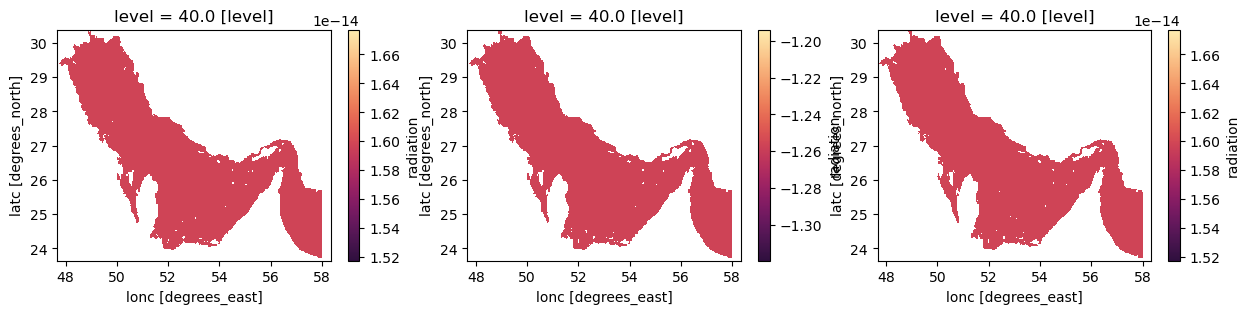

In [27]:
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(1, 3, 1)
radi_mean_rad.isel(time=3,level=40).plot.pcolormesh(cmap=cmo.matter_r)
# ax.pcolormesh(Z, cmap=cmo.matter)

# ax = fig.add_subplot(1, 4, 4)
# ds_weighted_interp.sst.isel(month=3).plot.pcolormesh(cmap=cmo.matter_r,levels=np.linspace(15,35,21))
# lightcmap = cmocean.tools.lighten(cmo.matter, 0.5)
# ax.pcolormesh(Z, cmap=lightcmap)
# fig.tight_layout()
ax = fig.add_subplot(1, 3, 2)
radi_mean_ctl.isel(time=3,level=40).plot.pcolormesh(cmap=cmo.matter_r)

ax = fig.add_subplot(1, 3, 3)
radi_mean_era.isel(time=3,level=40).plot.pcolormesh(cmap=cmo.matter_r)

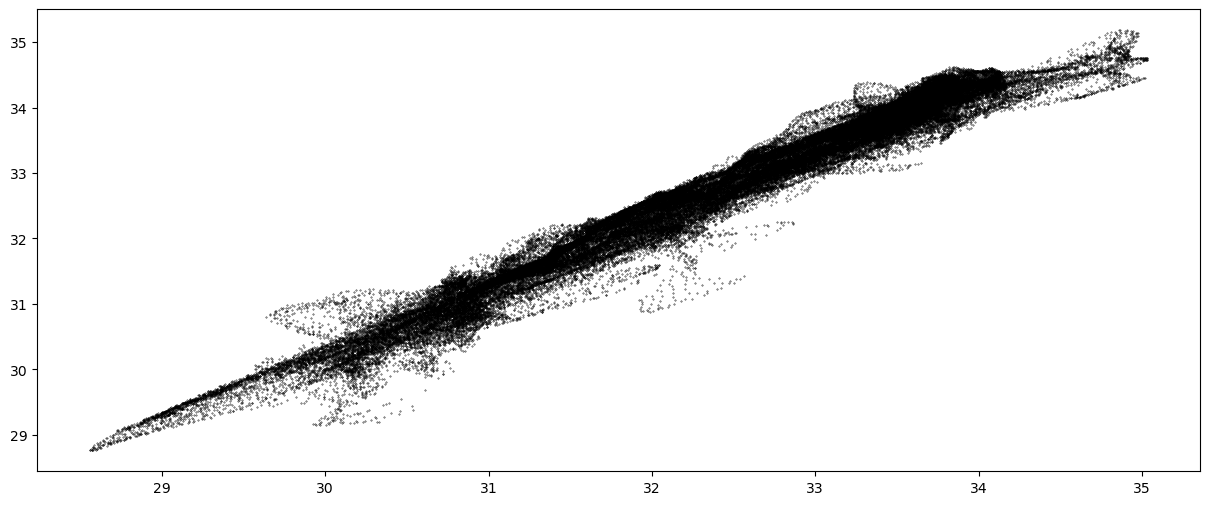

In [52]:
tctl = temp_mean_ctl.isel(time=6).data
trad = temp_mean_rad.isel(time=6).data

fig = plt.figure(figsize=(15, 6))
# ax = fig.add_subplot(1, 3, 1)

size0 = 0.1
plt.scatter(tctl[-1,:,:],trad[-1,:,:],color='black',s=0.1)
# fig.show()

In [ ]:
# 0. prepare information of data directories etc. 
casename = 'PersianGulf';
runname = 'data_ini_01012021/';

data_name = runname+'3d/'+casename

file_3d = data_name+'.3d.'

# 1. read the information of the tiles
parin = open('par_setup.dat','r')
# First line is number of subdomains:
nsubs_tgt=int(parin.readline())
print("We have %d tiles"%nsubs_tgt)

ioff0 = [0]*nsubs_tgt
joff0 = [0]*nsubs_tgt
# Second line is subdomain size and bathymetry size:
(nx_tgt,ny_tgt,nx_bat2,ny_bat2)= map(int,(parin.readline()).split())
for itile in range(nsubs_tgt):
    lin=parin.readline()
    lin=lin.rstrip()
    # TODO: We may get in problems if there are empty lines and/or comments
    (iss,ioff,joff,mww,nnw,nnn,nne,nee,nse,nss,nsw)=map(int,lin.split())
    ioff0[itile] = ioff
    joff0[itile] = joff
parin.close()
# we have nsubs_tgt, nx_tgt,ny_tgt, ioff0,joff0 here

# 2. load all the nc files as xarray datasets
datasets = []
for itile in range(nsubs_tgt):
    file0 = "%s%04d.nc" %(file_3d,itile)
    print("  Opening %s nc file "%file0)
    ds = xr.open_dataset(file0,mode='r')
    datasets.append(ds)
# we have datasets (xarray) here

# 3. information of coordinate     
xmax = max(ioff0)+nx_tgt
ymax = max(joff0)+ny_tgt

lon0 = np.zeros(xmax)
lat0 = np.zeros(ymax)
for itile in range(nsubs_tgt):

    a0 = datasets[itile].lonc[:]
    lon0[ioff0[itile]-1:ioff0[itile]+nx_tgt-1] = a0
    b0 = datasets[itile].latc[:]
    lat0[joff0[itile]-1:joff0[itile]+ny_tgt-1] = b0 

kkx = np.where(lon0 != 0)[0] # remove all zeros in lon coordinate
kky = np.where(lat0 != 0)[0] # remove all zeros in lat coordinate
# we have lon0,lat0,xmax,ymax,kkx,kky here

# load data 
lonc = nctileread(file_3d,'lonc')
latc = nctileread(file_3d,'latc')
time = nctileread(file_3d,'time')
level = nctileread(file_3d,'level')
elev = nctileread(file_3d,'elev')
temp = nctileread(file_3d,'temp')
salt = nctileread(file_3d,'salt')
h    = nctileread(file_3d,'h')
radi = nctileread(file_3d,'radiation')

We have 144 tiles
  Opening data_ini_01012021/3d/PersianGulf.3d.0000.nc nc file 
  Opening data_ini_01012021/3d/PersianGulf.3d.0001.nc nc file 
  Opening data_ini_01012021/3d/PersianGulf.3d.0002.nc nc file 
  Opening data_ini_01012021/3d/PersianGulf.3d.0003.nc nc file 
  Opening data_ini_01012021/3d/PersianGulf.3d.0004.nc nc file 
  Opening data_ini_01012021/3d/PersianGulf.3d.0005.nc nc file 
  Opening data_ini_01012021/3d/PersianGulf.3d.0006.nc nc file 
  Opening data_ini_01012021/3d/PersianGulf.3d.0007.nc nc file 
  Opening data_ini_01012021/3d/PersianGulf.3d.0008.nc nc file 
  Opening data_ini_01012021/3d/PersianGulf.3d.0009.nc nc file 
  Opening data_ini_01012021/3d/PersianGulf.3d.0010.nc nc file 
  Opening data_ini_01012021/3d/PersianGulf.3d.0011.nc nc file 
  Opening data_ini_01012021/3d/PersianGulf.3d.0012.nc nc file 
  Opening data_ini_01012021/3d/PersianGulf.3d.0013.nc nc file 
  Opening data_ini_01012021/3d/PersianGulf.3d.0014.nc nc file 
  Opening data_ini_01012021/3d/Persia

In [1]:
ds_combined = xr.Dataset(
    data_vars=dict(
        temp=(["time","level", "latc", "lonc"], temp),
        salt=(["time","level", "latc", "lonc"], salt),
        radiation=(["time","level", "latc", "lonc"], radi),
        h=(["time","level", "latc", "lonc"], h),
        evel=(["time", "latc", "lonc"], elev),
    ),
    coords=dict(
        lonc=(["lonc"], lonc),
        latc=(["latc"], latc),
        level=(["level"], level),
        time=time,
    ),
    attrs=dict(description="Weather related data."),
)

NameError: name 'xr' is not defined

In [ ]:
## save the xarray dataset to nc file for next using

ds_combined.to_netcdf("data_combined.nc")

In [ ]:
temp2 = np.ma.masked_equal(temp[0,40,:,:],0)
# print(temp2.shape)

plt.figure(figsize=[10,6])
plt.contourf(temp2,levels=40)
plt.colorbar()

In [229]:
plt.figure(figsize=[10,6])
ds_combined.temp.isel(time=0, level=40).plot()

NameError: name 'ds_combined' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:

nd = length(size(tmp1));

ntile=144;
nxm=85;
nym=85;

if length(varargin)==2
    arr1 = varargin{1};
    arr2 = varargin{2};
elseif length(varargin)==3
    arr1 = varargin{1};
    arr2 = varargin{2};
    arr3 = varargin{3};
end

for ik = 0:ntile-1
%         disp(['tile = ',num2str(ik)])
        file0 = [file,num2str(ik,'%04d'),'.nc'];
        ioff = ncread(file0,'ioff');
        a0 = ncread(file0,'lonc');
        lon0(ioff:ioff+nxm-1,1) = a0;
        joff = ncread(file0,'joff');
        a0 = ncread(file0,'latc');
        lat0(joff:joff+nym-1,1) = a0;
end

kkx = find(lon0~=0);
kky = find(lat0~=0);

if nd==2
    if strcmp(var,'lonc')
        for ik = 0:ntile-1
            disp(['tile = ',num2str(ik)])
            file0 = [file,num2str(ik,'%04d'),'.nc'];
            ioff = ncread(file0,'ioff');
            a0 = ncread(file0,var);
            a(ioff:ioff+nxm-1,1) = a0;
        end
        a=a(kkx,1);
    elseif strcmp(var,'latc')
        for ik = 0:ntile-1
            disp(['tile = ',num2str(ik)])
            file0 = [file,num2str(ik,'%04d'),'.nc'];
            joff = ncread(file0,'joff');
            a0 = ncread(file0,var);
            a(joff:joff+nym-1,1) = a0;
        end
        a=a(kky,1);
    elseif strcmp(var,'time')
            file0 = [file,'0000.nc'];
            a0 = ncread(file0,var);
            a = a0;
    else
        for ik = 0:ntile-1
            disp(['tile = ',num2str(ik)])
            file0 = [file,num2str(ik,'%04d'),'.nc'];
            ioff = ncread(file0,'ioff');
            joff = ncread(file0,'joff');
            a0 = ncread(file0,var);
            a(ioff:ioff+nxm-1,ioff:joff+nym-1) = a0;
        end
        a = a(kkx,kky);
    end
elseif nd==3
    for ik = 0:ntile-1
        disp(['tile = ',num2str(ik)])
        file0 = [file,num2str(ik,'%04d'),'.nc'];
        ioff = ncread(file0,'ioff');
        joff = ncread(file0,'joff');
        if length(varargin)==2
            a0 = ncread(file0,var,arr1,arr2);
        elseif length(varargin)==3
            a0 = ncread(file0,var,arr1,arr2,arr3);
        else
            a0 = ncread(file0,var);
        end
        a(ioff:ioff+nxm-1,ioff:joff+nym-1,:) = a0;
    end
    a = a(kkx,kky,:);
elseif nd==4
    for ik = 0:ntile-1
        disp(['tile = ',num2str(ik)])
        file0 = [file,num2str(ik,'%04d'),'.nc'];
        ioff = ncread(file0,'ioff');
        joff = ncread(file0,'joff');
        if length(varargin)==2
            a0 = ncread(file0,var,arr1,arr2);
        elseif length(varargin)==3
            a0 = ncread(file0,var,arr1,arr2,arr3);
        end
        a(ioff:ioff+nxm-1,joff:joff+nym-1,:,:) = a0;
    end
    a = a(kkx,kky,:,:);
else
    error(['Wrong variables with dim= ',num2str(nd)])
end




In [18]:
#  read SST of new  
    casename = 'PersianGulf';
    runname = 'data_ini_01012021/';
#    runname = './';

    data_name = runname+'3d/'+casename

# %     disp(file_3d)
    file_3d = data_name+'.3d.'
    
#     print('******Reading Var: '+var+'  ******')
    tmp1 = xr.open_dataset(file_3d+'0000.nc');
    tmp2 = xr.open_dataset(file_3d+'0001.nc');
    
#     xc = nctileread(file_3d,'lonc');
#     yc = nctileread(file_3d,'latc');
#     swr_new = nctileread(file_3d,'radiation',[1 1 41 1],[Inf,Inf,1,Inf]);
#     temp_new = nctileread(file_3d,'temp',[1 1 41 1],[Inf,Inf,1,Inf]);

#     temp_new(temp_new==0) = nan;
#     swr_new(swr_new==0) = nan;

# %     temp_mean_shr = ncread(file_3d,'temp',[1 1 41 1],[Inf,Inf,1,Inf]);
# %     salt_mean_shr = ncread(file_3d,'salt',[1 1 41 1],[Inf,Inf,1,Inf]);
#     time_new = nctileread(file_3d,'time');

In [123]:
def nctileread(hotfile0,var,ntile):
    # Get meta-data on the old/source hotstart files

    print("Reading source hotstart meta data")
    
    #     hotfile0=os.path.join(indir,restartfilemould%0)

    print("  Opening %s to get dimension and variable metadata"%hotfile0)
    nchotsrc0 = netCDF.Dataset(hotfile0+'0000.nc',mode='r')

    xdimnam = 'lonc'
    ydimnam = 'latc'
    zdimnam = 'level'
    tdimnam = 'time'
    dims2d  = (ydimnam,xdimnam)
    dims3d  = (tdimnam,ydimnam,xdimnam)
    dims4d  = (tdimnam,zdimnam,ydimnam,xdimnam)

    ##
    # Number of layers to define target dimensions.
    # (I dont know how this will work for non-s coordinates):
    nz_src    = len(nchotsrc0.dimensions[zdimnam])
    zvals_src = nchotsrc0.variables[zdimnam][:]


    ##
    # Get names of all the variables in the hotstart file(s). These should later be
    # copied/transferred to target hotstart files.
    #
    # It appears that the coordinate variables are the only 1D variables in the hotstart files.
    # Get *additional* variables from the hotstart file - class them as:
    #  Scalars
    #  2D (yax,xax)
    #  3D (zax,yax,xax)
    hotvarnams_0d = ()
    hotvarnams_1d = ()
    hotvarnams_2d = ()
    hotvarnams_3d = ()
    hotvarnams_4d = ()

    # This is to store scalars (which should not vari from one hotstart file to the next!
    hotvars0d = {}

    for varnam in nchotsrc0.variables.keys():
        if varnam==var:
            print(varnam)
            ndimsvar   = len(nchotsrc0.variables[varnam].dimensions)
            dimvarnams =     nchotsrc0.variables[varnam].dimensions
            print(ndimsvar)
            print(dimvarnams)
            if ndimsvar==0:
                # This is a scalar - cattenate to tuple:
                hotvarnams_0d += (varnam,)
                thistype  = nchotsrc0.variables[varnam].dtype
                thisvalue = nc_read_scalar(nchotsrc0,varnam)
                hotvars0d[varnam] = {'type':thistype, "value":thisvalue}
            elif ndimsvar==1:
                # This is a vector - we just check that it is a coordinate variable
                if (dimvarnams[0] != varnam):
                    raise AssertionError("Hotstart 1D variable %s does not seem to be a coordinate variable - layout of hotstart files may have changed?"%varnam)
                if (varnam!=dims4d[0] and varnam!=dims4d[1] and varnam!=dims4d[2] and varnam!=dims4d[3]):
                    raise AssertionError("Unexpected coordinate variable %s in hotstart file - layout of hotstart files may have changed?"%varnam)
                hotvarnams_1d += (varnam,)
            elif ndimsvar==2:
                # 2D variables are expected to be spanned by (yax,xax):
                if (dimvarnams!=dims2d):
                    raise AssertionError("Hotstart 2D variable %s spanned by (%s,%s) - expected (%s,%s)"%\
                          (varnam,)+dimvarnams+dims2d)
                # Cattenate to tuple:
                hotvarnams_2d += (varnam,)
            elif ndimsvar==3:
                # 3D variables are expected to be spanned by (zax,yax,xax):
                if (dimvarnams!=dims3d ):
                    raise AssertionError("Hotstart 3D variable %s spanned by (%s,%s,%s) - expected (%s,%s,%s)"%\
                          (varnam,)+dimvarnams+dims3d)
                # Cattenate to tuple:
                hotvarnams_3d += (varnam,)
            elif ndimsvar==4:
                # 3D variables are expected to be spanned by (zax,yax,xax):
                if (dimvarnams!=dims4d ):
                    raise AssertionError("Hotstart 3D variable %s spanned by (%s,%s,%s) - expected (%s,%s,%s)"%\
                          (varnam,)+dimvarnams+dims3d)
                # Cattenate to tuple:
                hotvarnams_4d += (varnam,)


    # We will keep the no0 file open for later easy copy of all scalars and attributes etc.
    #nchotsrc0.close()

    print("  Reading coordinate information from all source hotstart files")
    hotin_coords = {}
    # Get (y,x) coordinate data from all the input files to be able to perform 
    # reasonably fast search/scan to patch together target domains.
    for ihotin in range(ntile):
#         hotfile=os.path.join(indir,restartfilemould%ihotin)
        hotfile = "%s%04d.nc" %(hotfile0,ihotin)
        nchotsrc = netCDF.Dataset(hotfile,mode='r')
        # Dict in dict to keep the actual values:
        hotin_coords[hotfile] = {}
        # Check scalars (this is really not necessary)
        # Read coordinate variables
        for varnam in dims2d:
            varvals=nchotsrc.variables[varnam][:]
            hotin_coords[hotfile][varnam]=varvals
            print(varvals)
    
        # This file will be opened again only when it is needed for overlapping new subdomain(s)
        nchotsrc.close()


In [108]:
def nc_read_scalar(ncobj,varnam):
    # Assert that the variable exists, and that it is in fact a scalar.
    #if not ncobj.variables.has_key(varnam):
    if not varnam in ncobj.variables:
        raise AssertionError("Failed to read %s: Netcdf object not open, or doesnt contain this varaible"%varnam)
    if len(ncobj.variables[varnam].dimensions)>0:
        dims=ncobj.variables[varnam].dimensions
        dimstr=','.join(dims)
        raise AssertionError("Failed to read %s: Variable is not a scalar, it is spanned by (%s)"%(varnam,dimstr))
    try:
        # For older library versions - return as array with a single element,
        # hence the [0] to get just the element from the array:
        this_val=(ncobj.variables[varnam][:])[0]
    except:
        # For newer libraries, scalars mey be read as,]
        #   see http://unidata.github.io/netcdf4-python/)
        # <quote>
        # Special note for scalar variables: To extract data from a 
        # scalar variable v with no associated dimensions, use 
        #     np.asarray(v)   or    v[...].
        # The result will be a numpy scalar array.
        # </quote>
        # The first part does not seem to work:
        #grid_type = np.asarray(ncbatfil.variables['grid_type'])
        # However, the second seems OK:
        this_val = ncobj.variables[varnam][...]
    return this_val
